In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up visual aesthetics
sns.set(style='whitegrid')


# Load dataset
df = pd.read_csv('data.xlsx - Sheet1.csv')

# Display the first few rows
df.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [2]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Summary of the dataset
df.info()

# Descriptive statistics
df.describe()

Shape of the dataset: (3998, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [2]:
df.isnull().sum()  # Count missing values per column

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

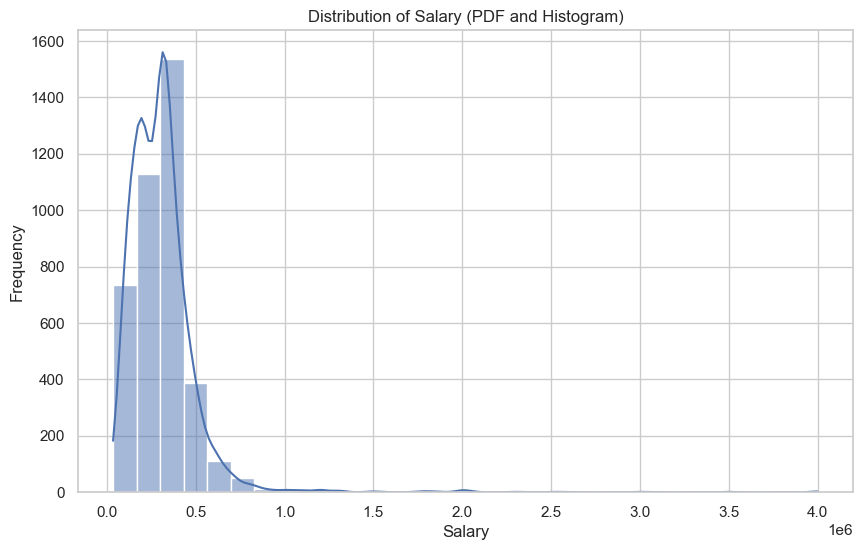

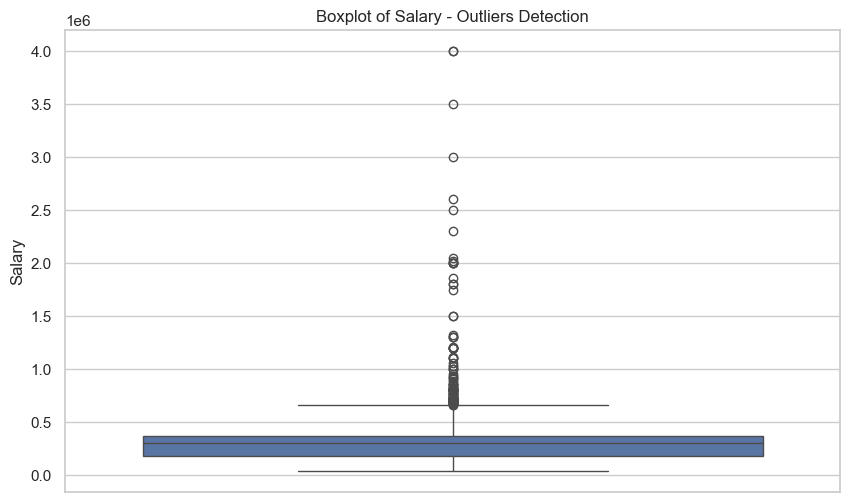

In [3]:
# Histogram of Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Distribution of Salary (PDF and Histogram)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Salary
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Salary'])
plt.title('Boxplot of Salary - Outliers Detection')
plt.show()

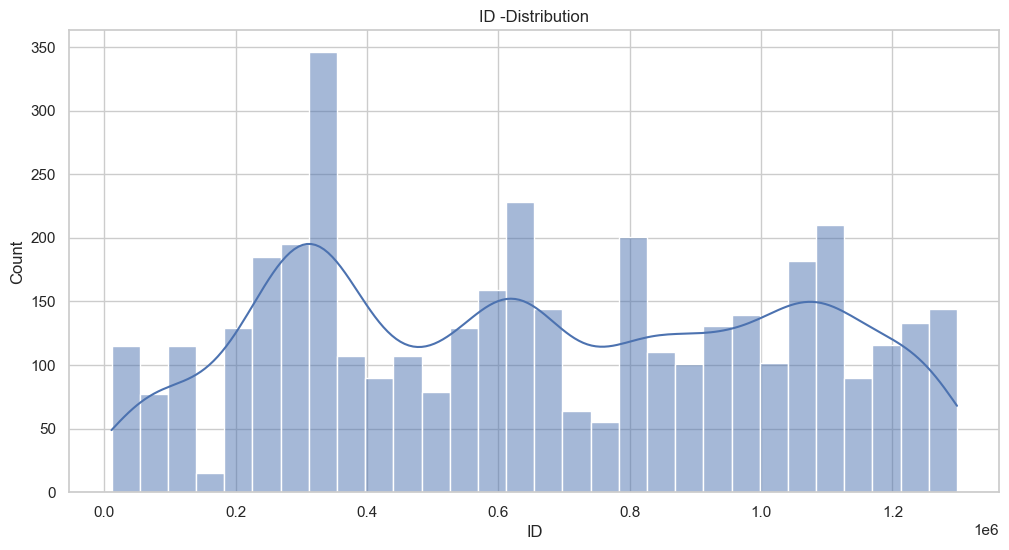

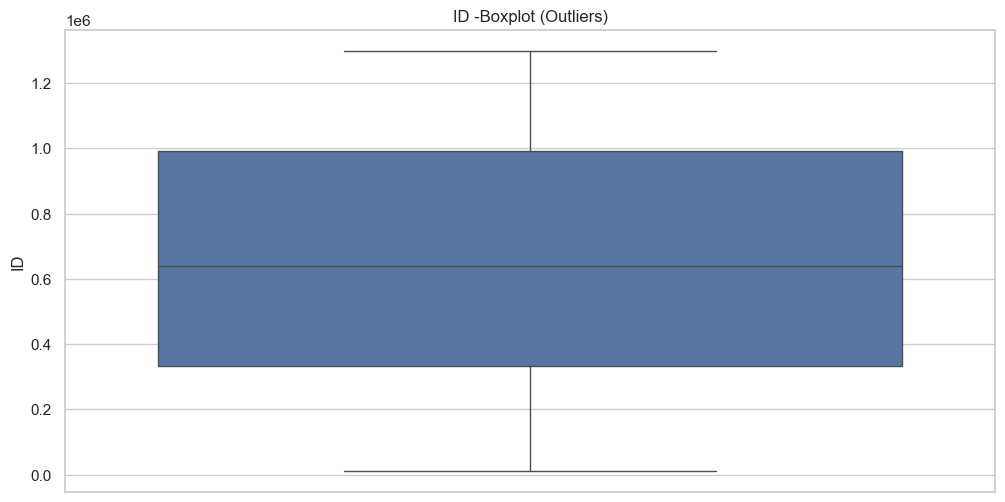

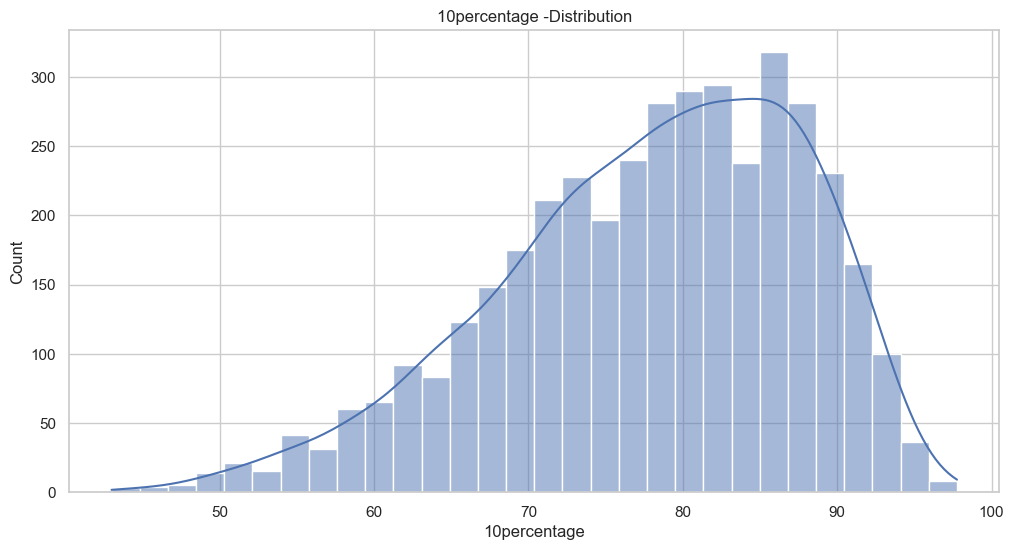

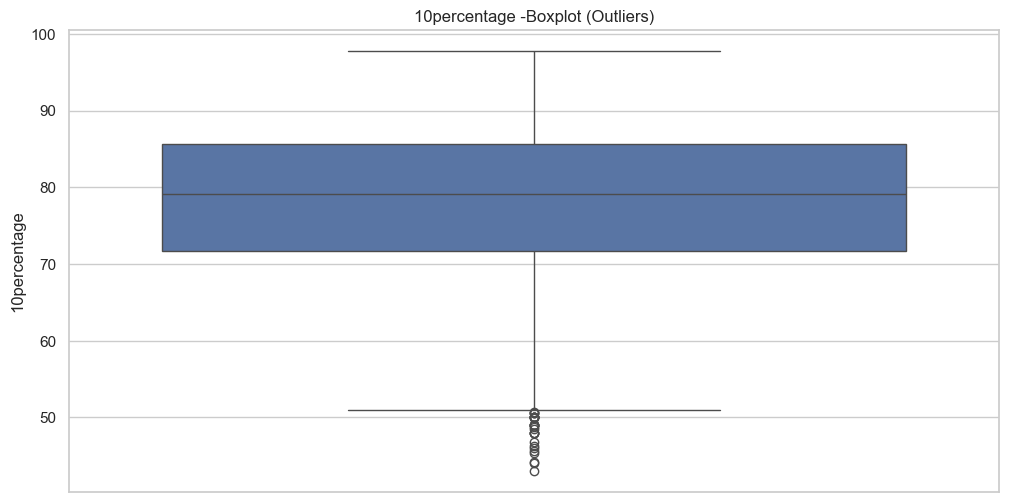

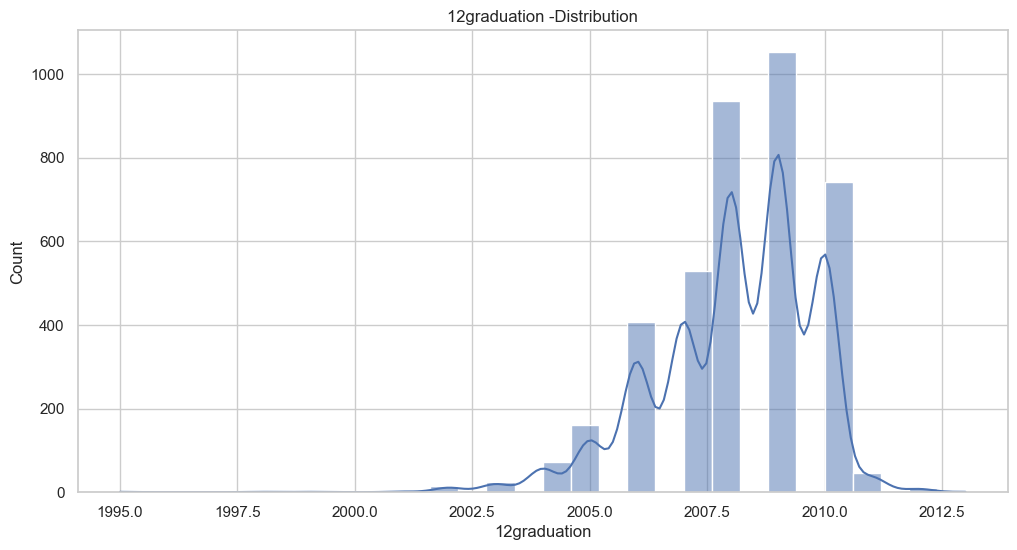

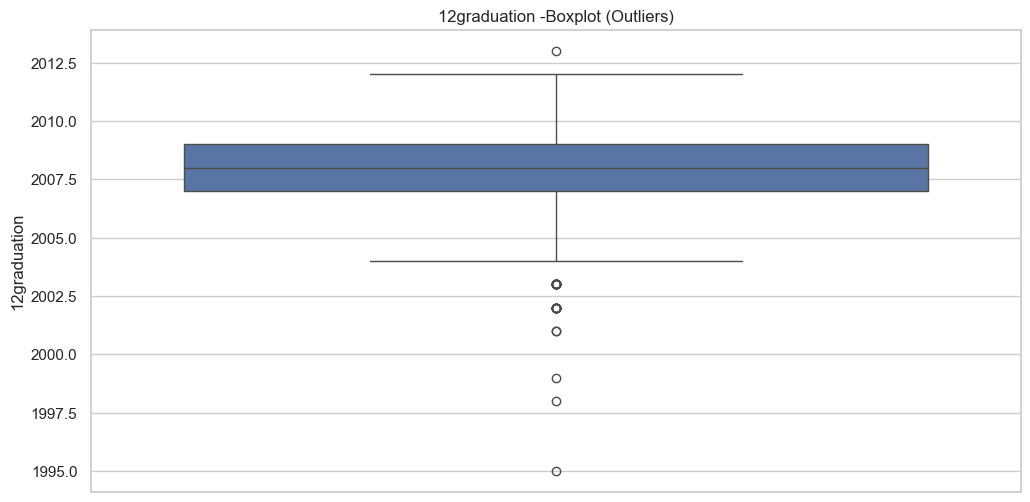

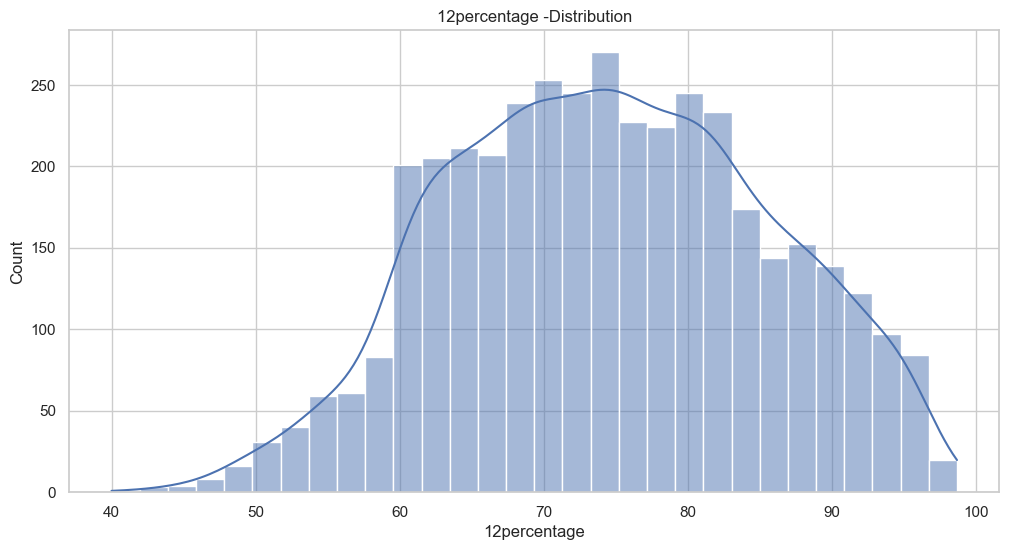

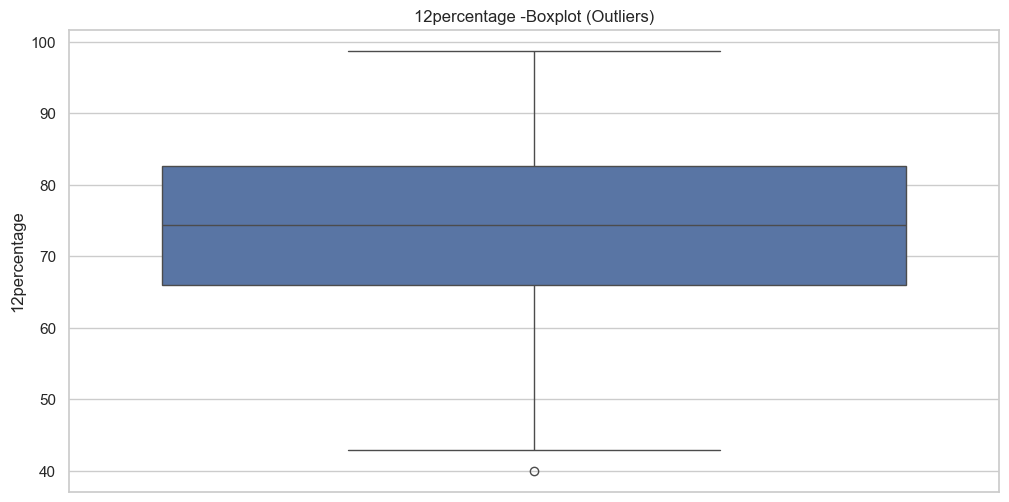

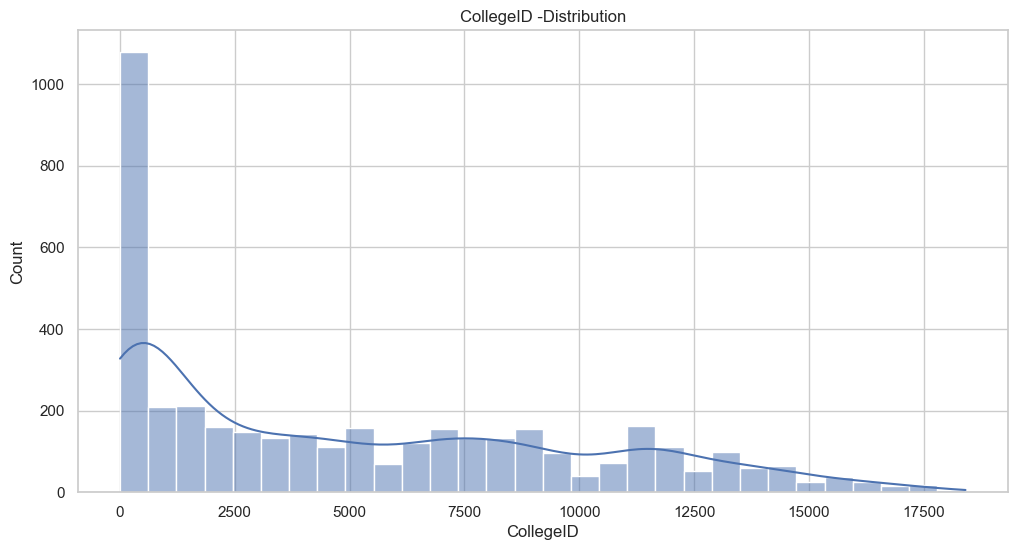

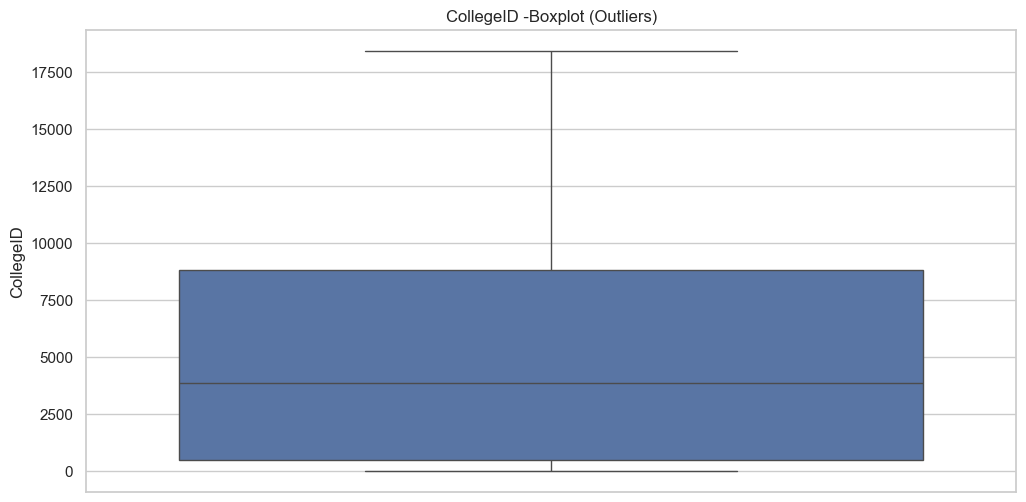

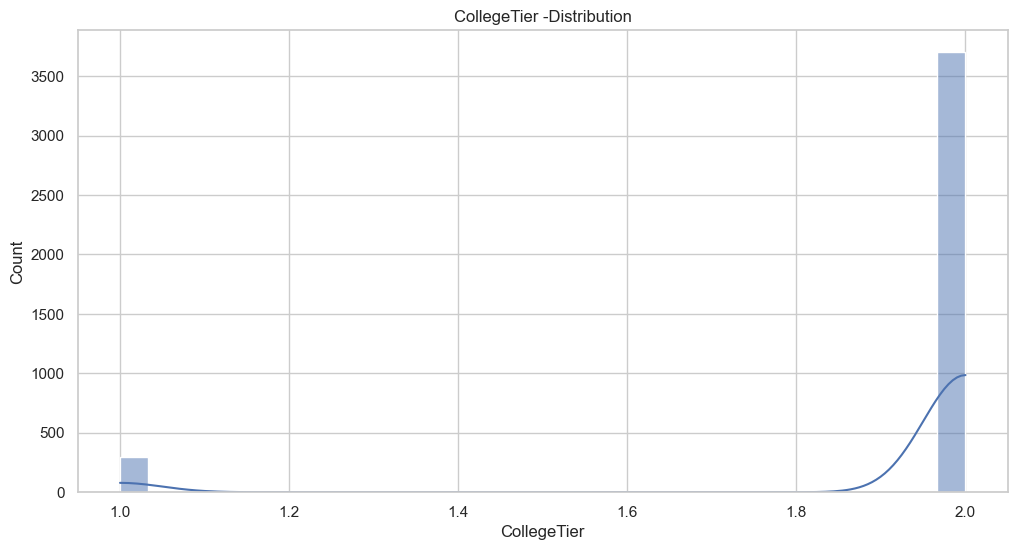

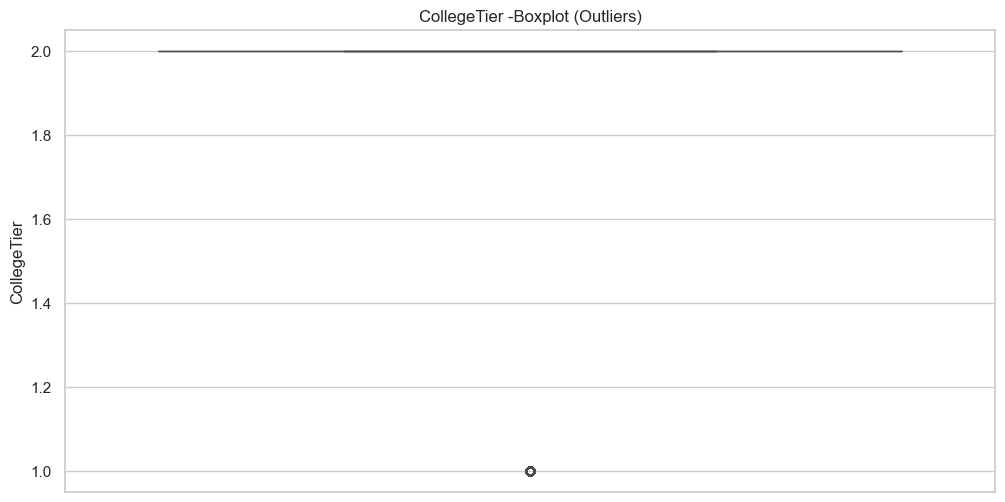

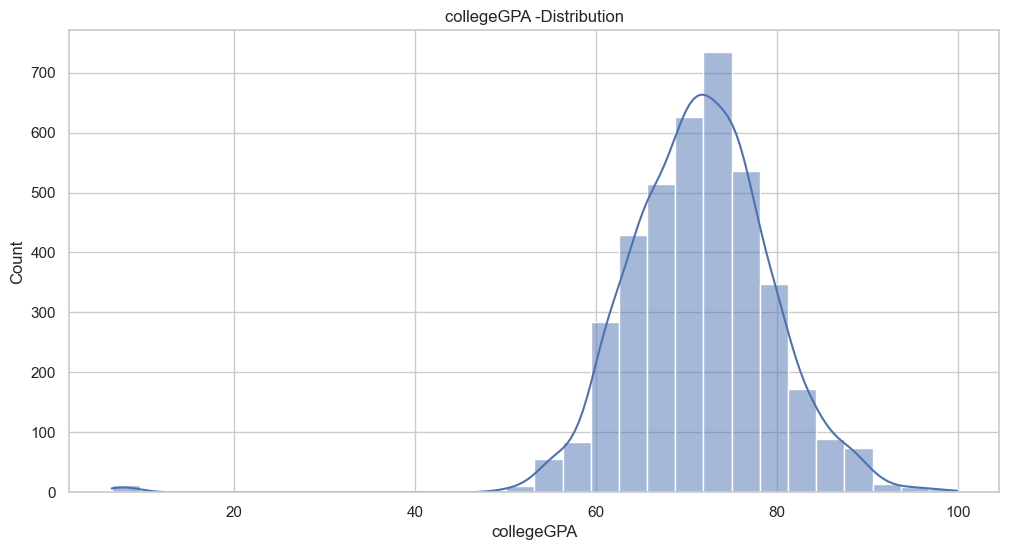

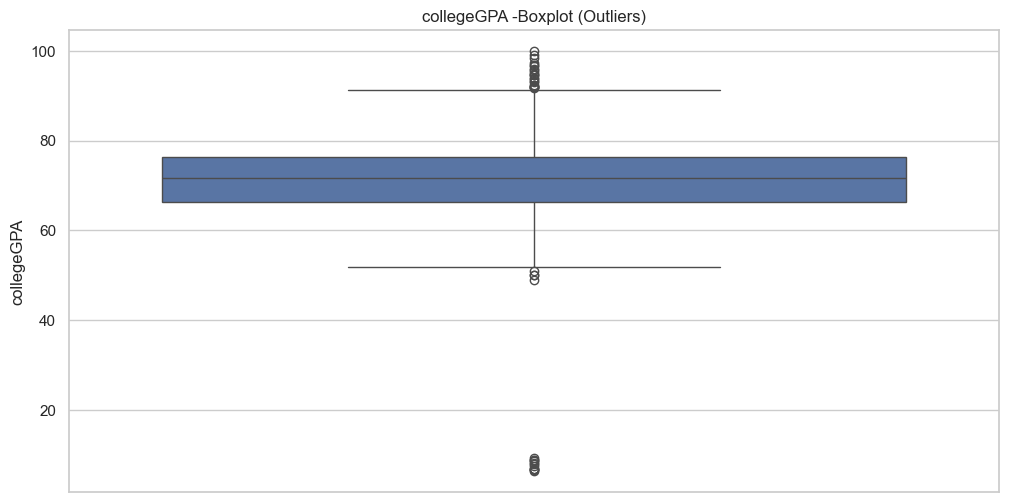

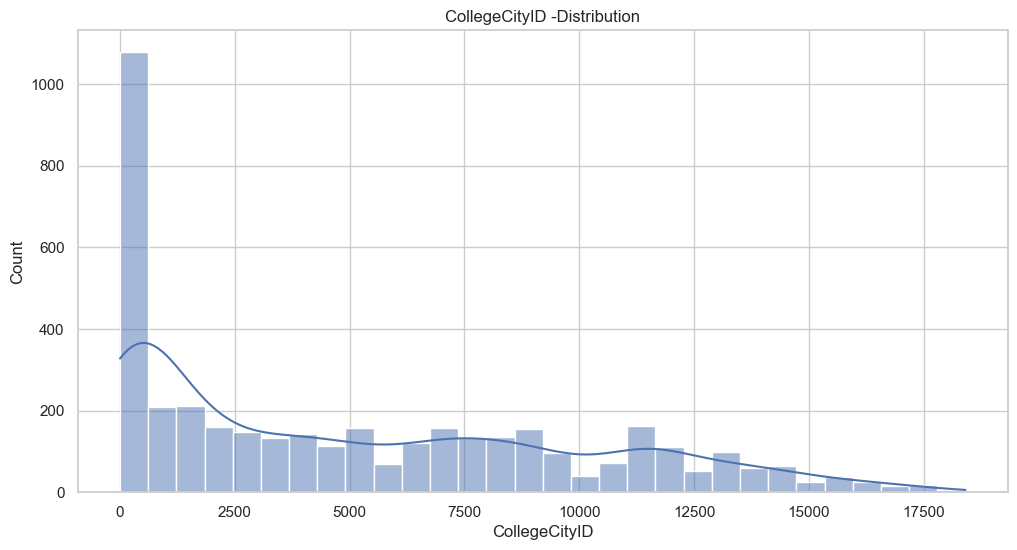

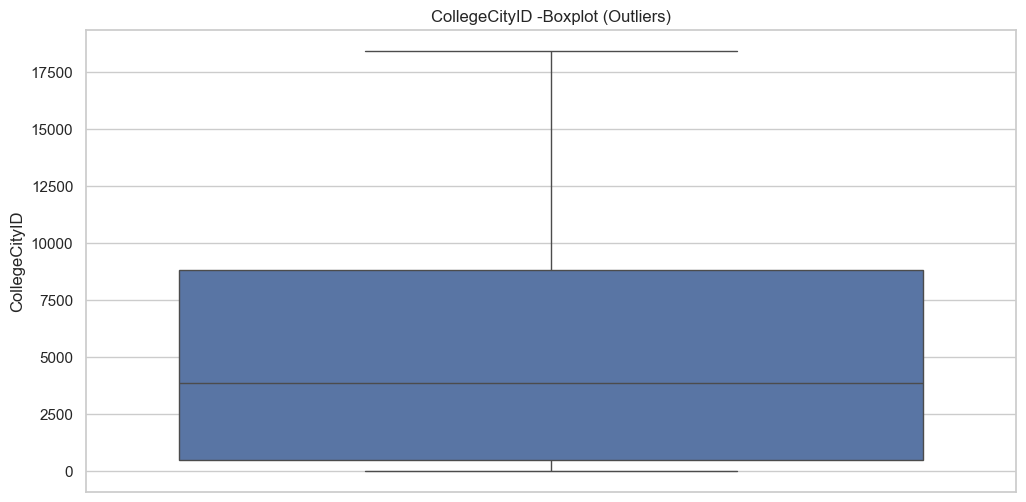

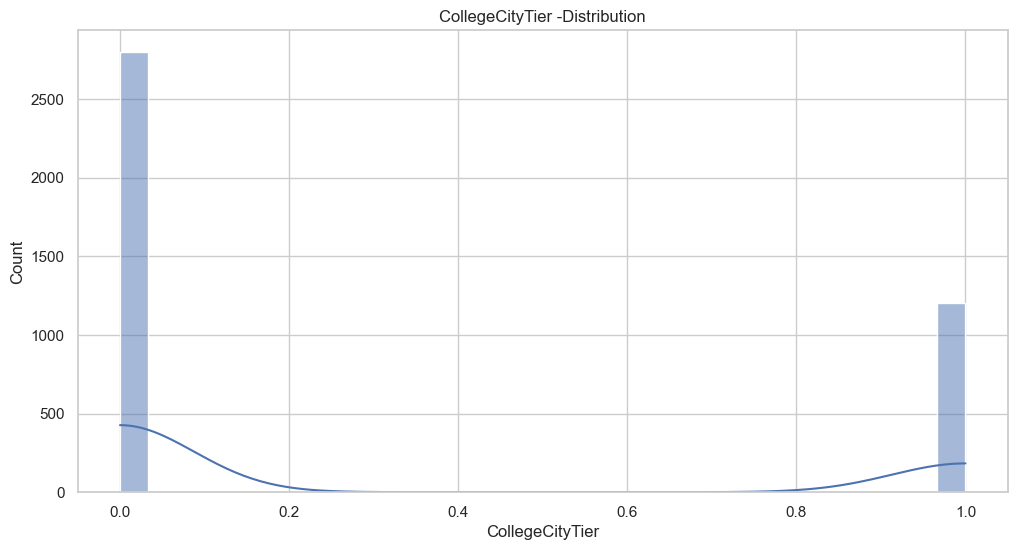

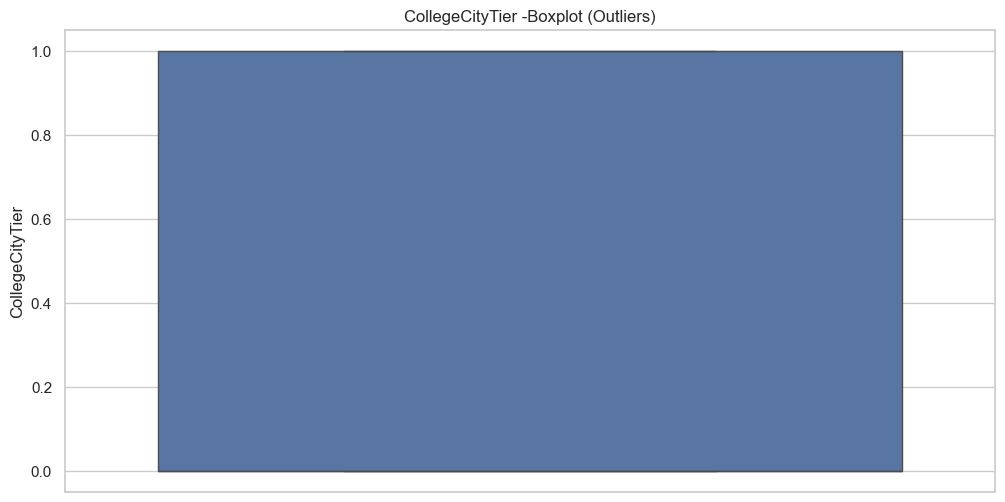

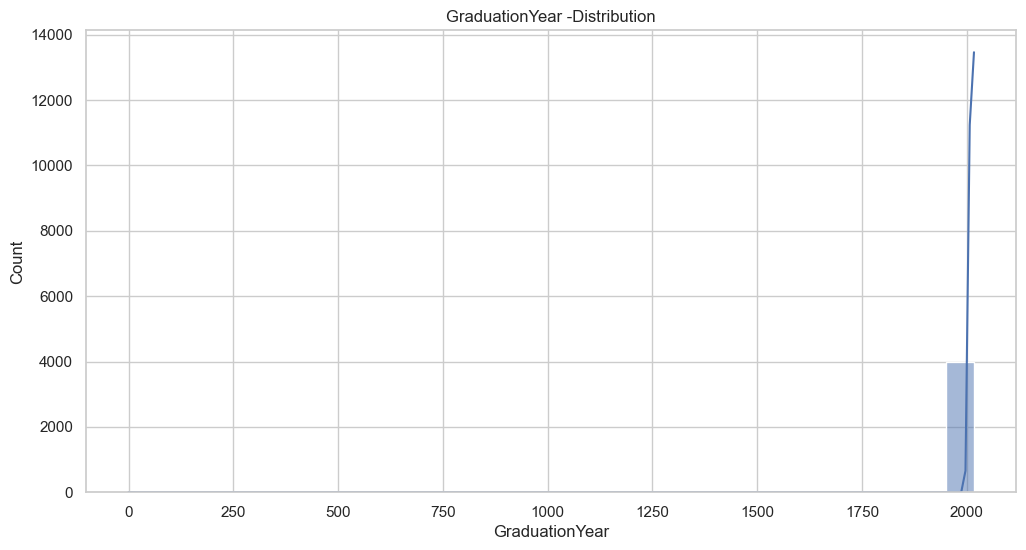

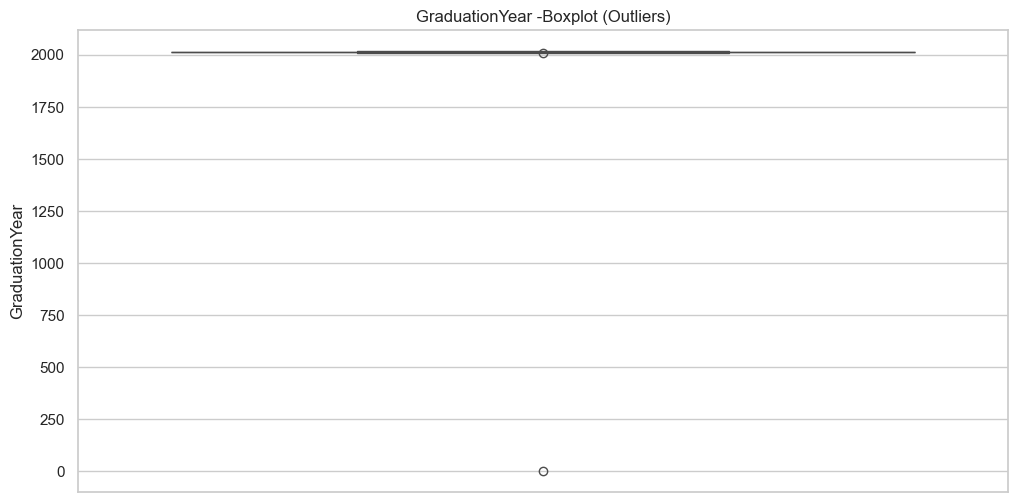

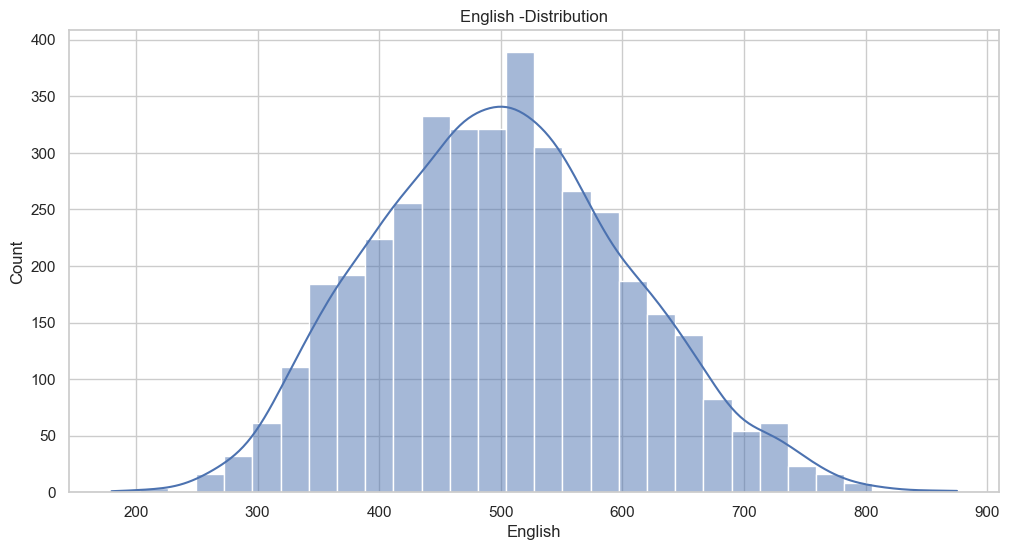

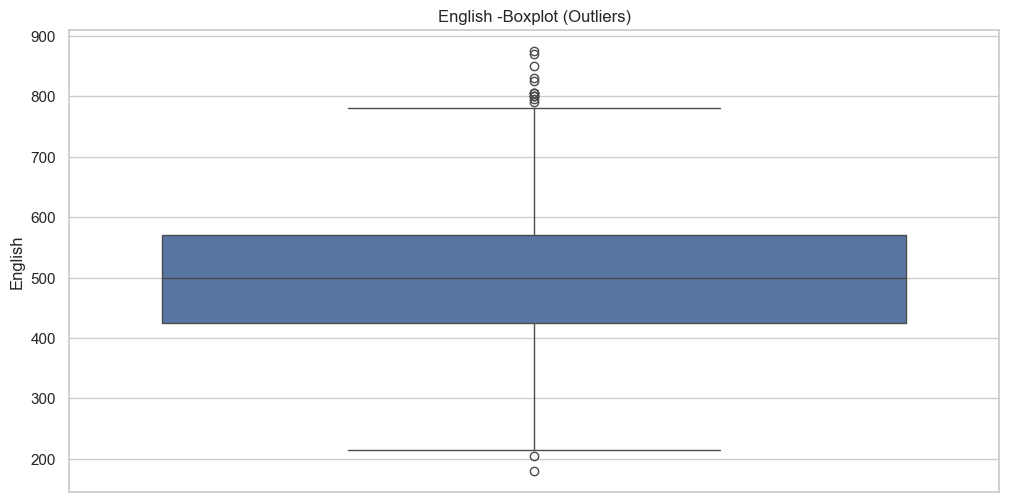

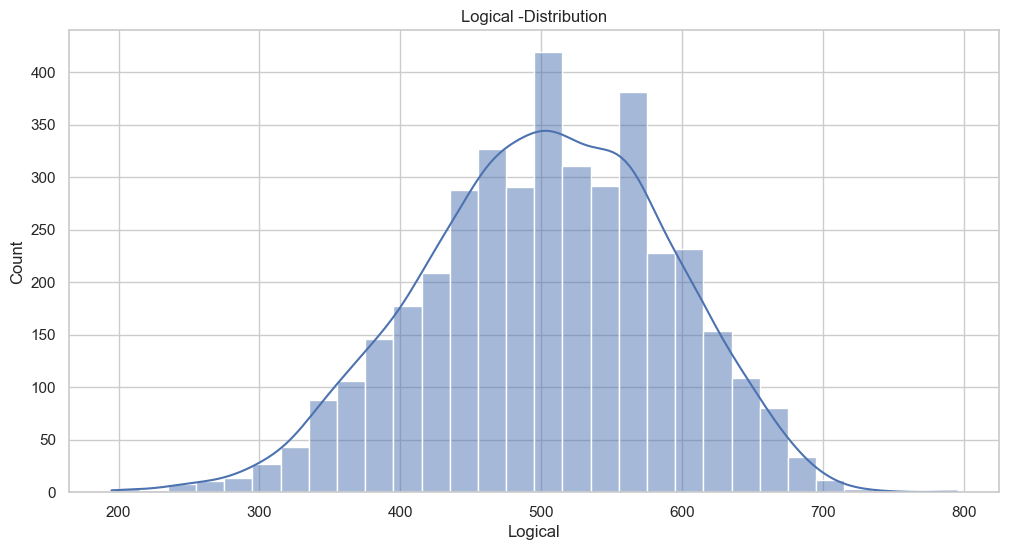

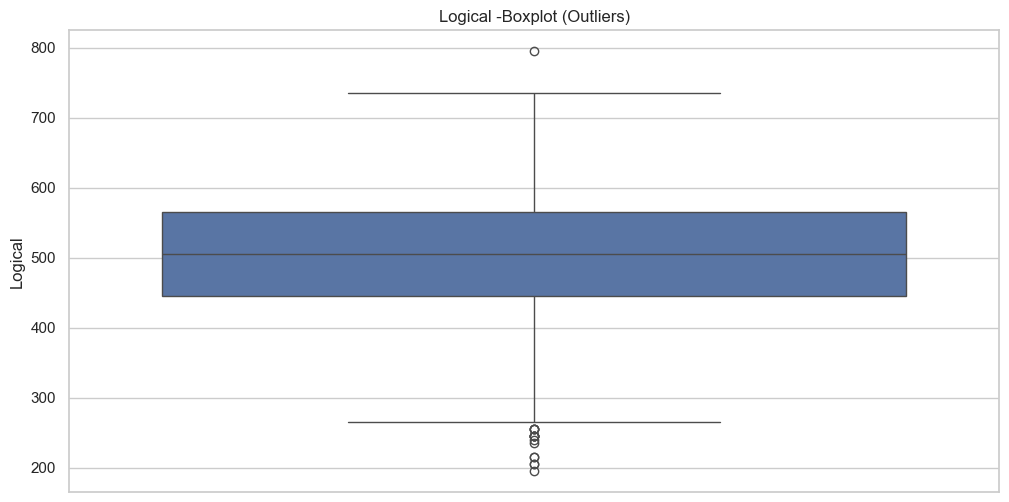

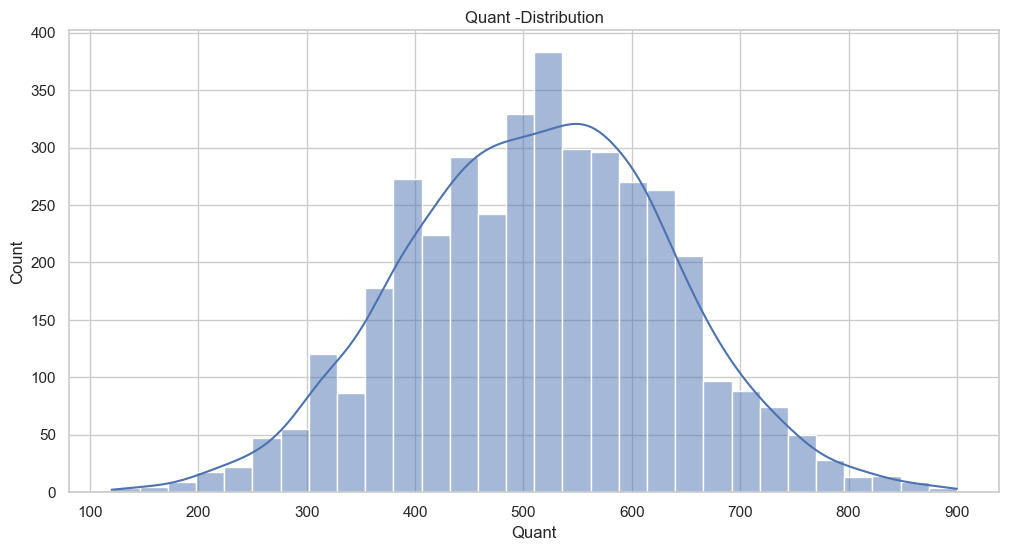

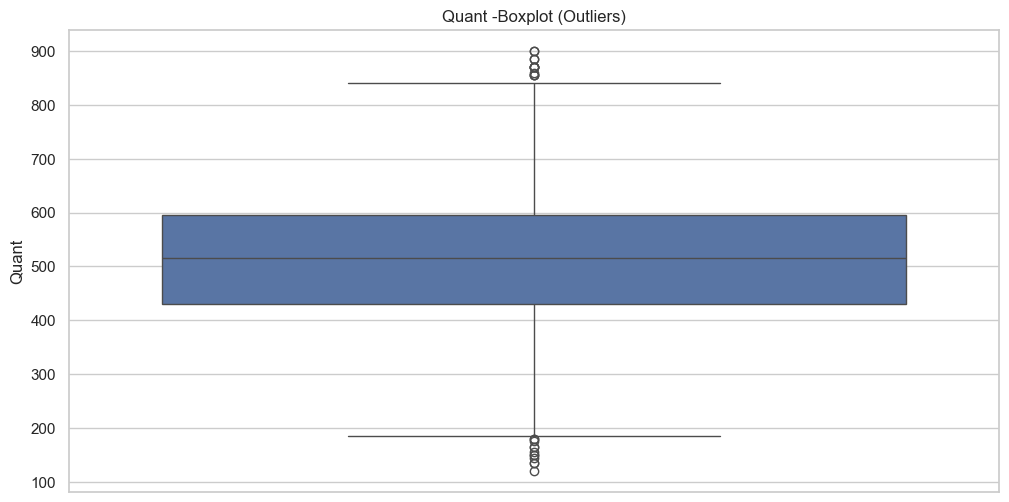

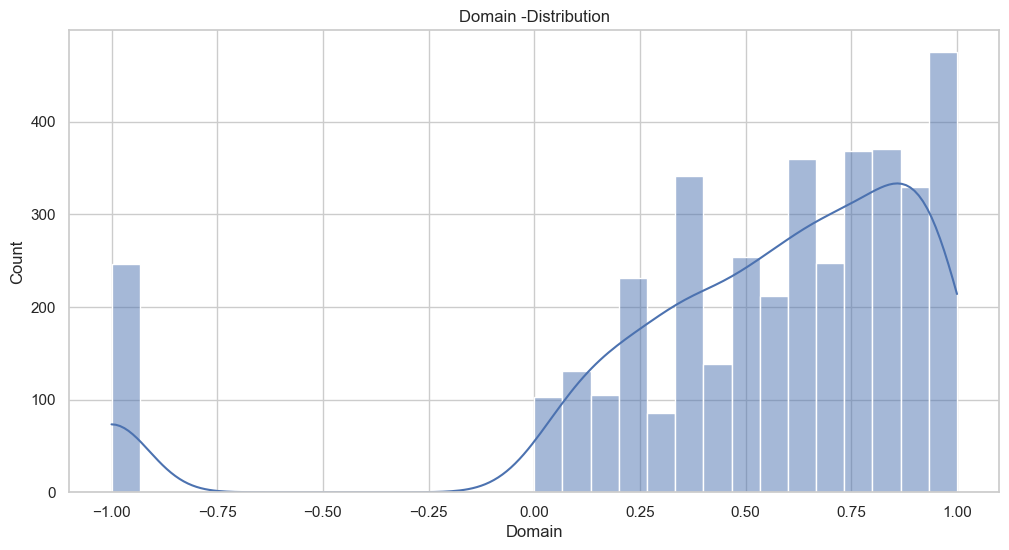

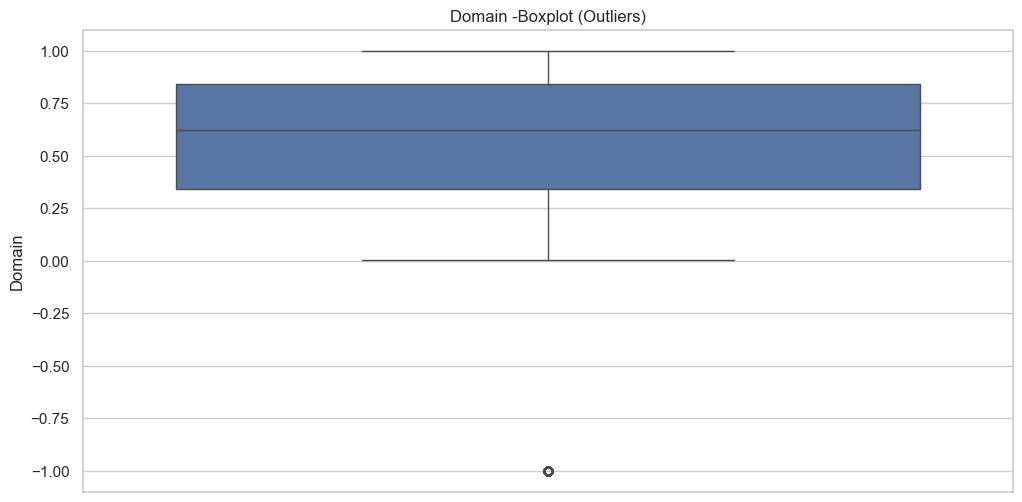

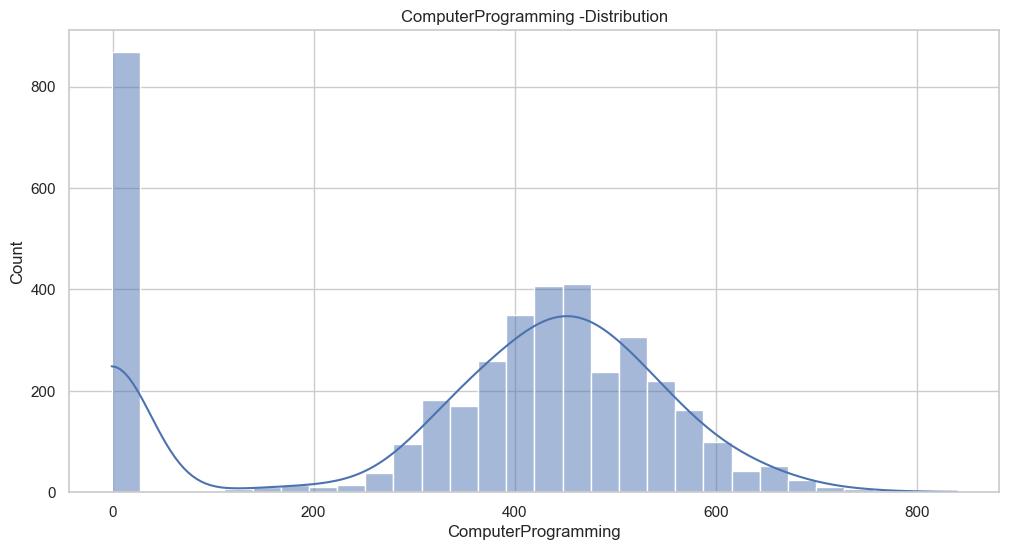

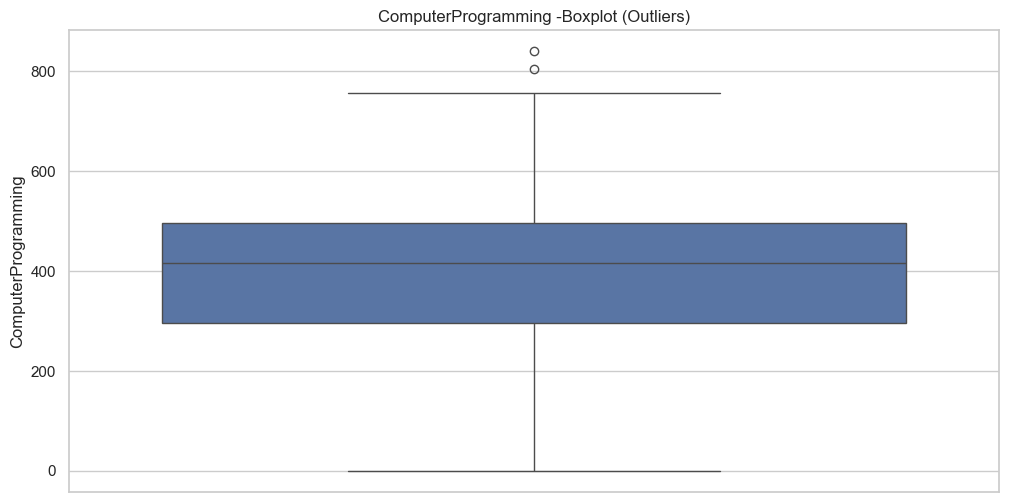

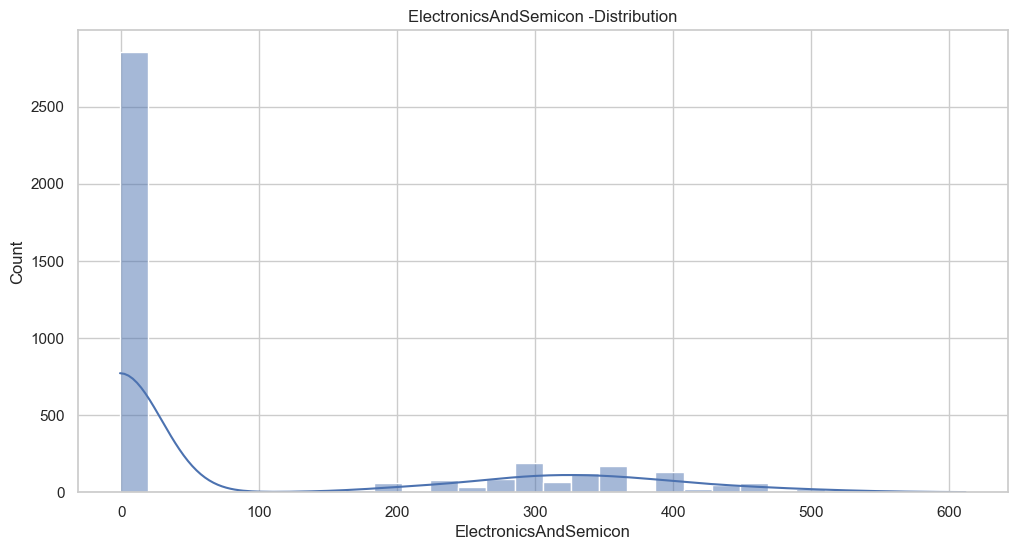

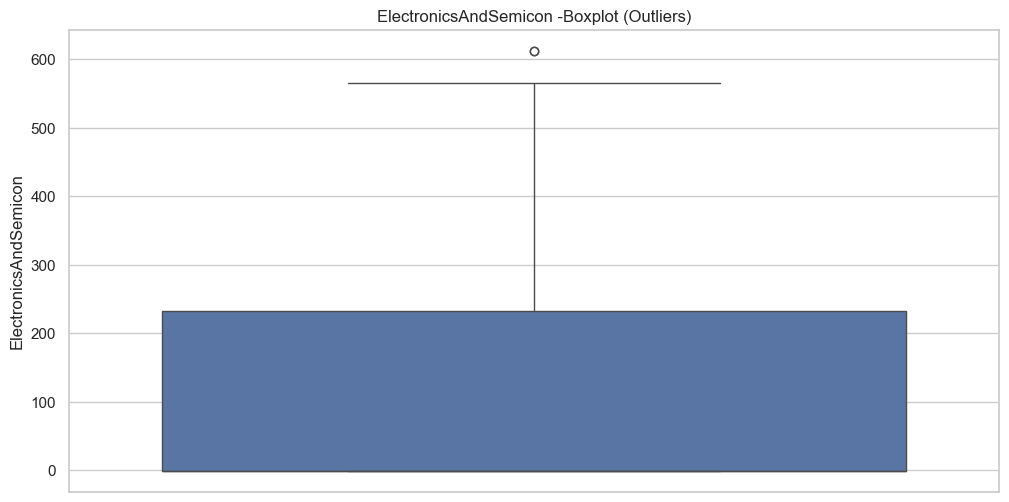

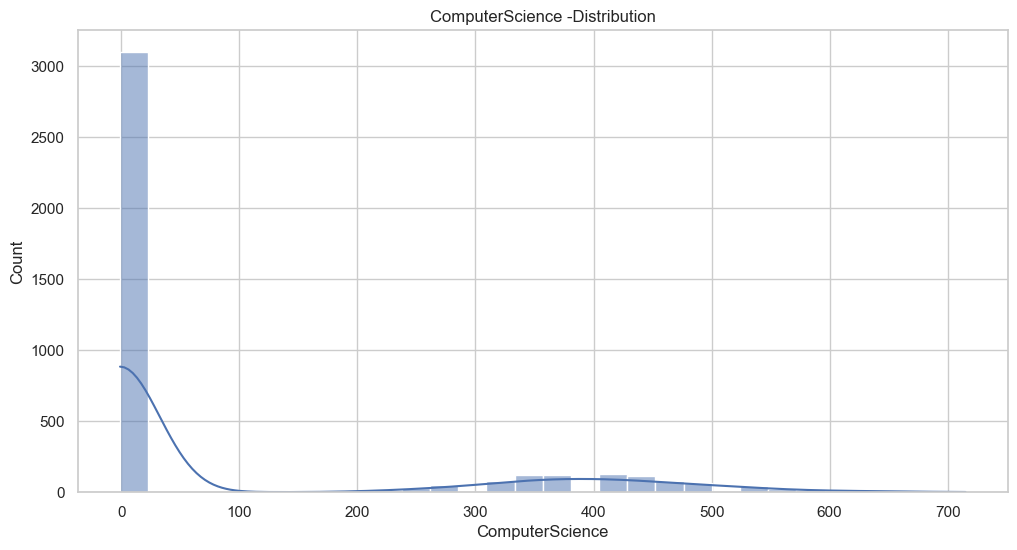

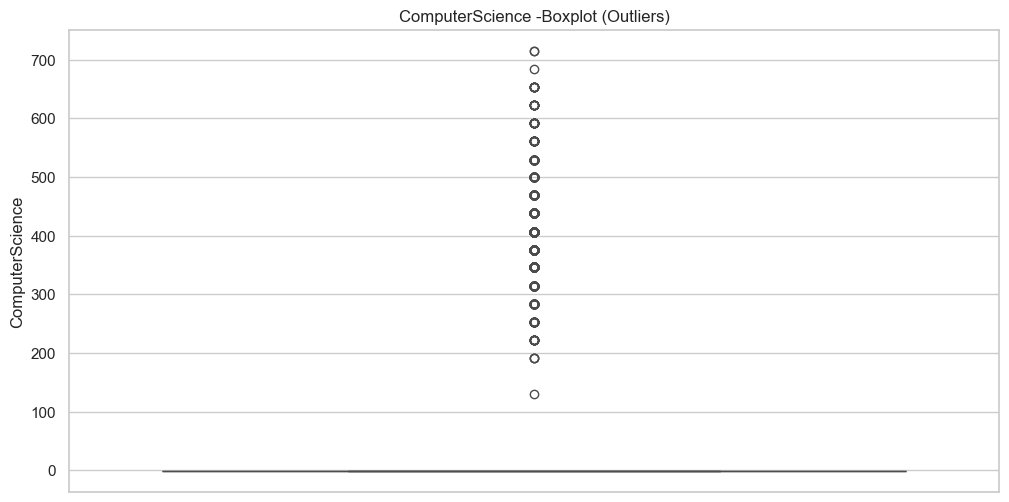

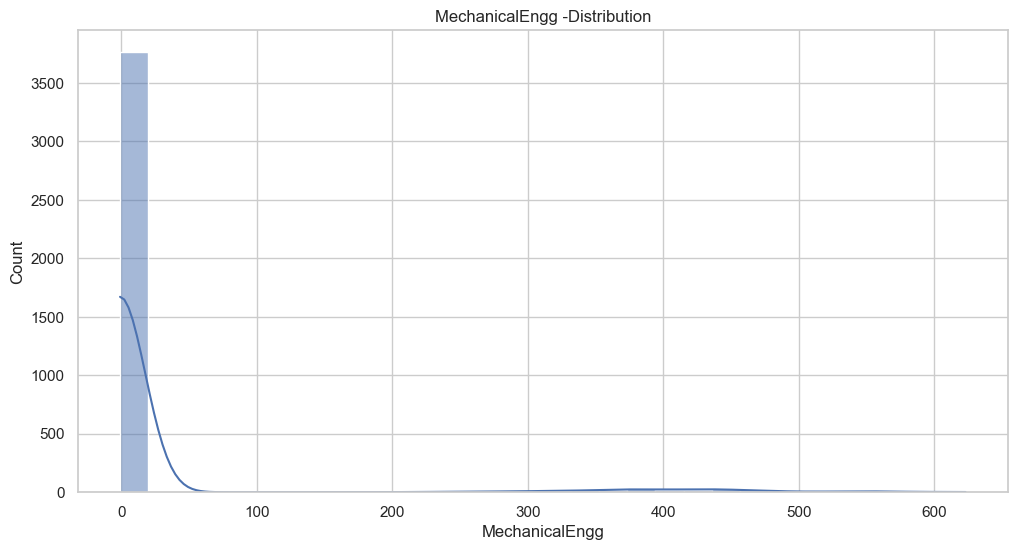

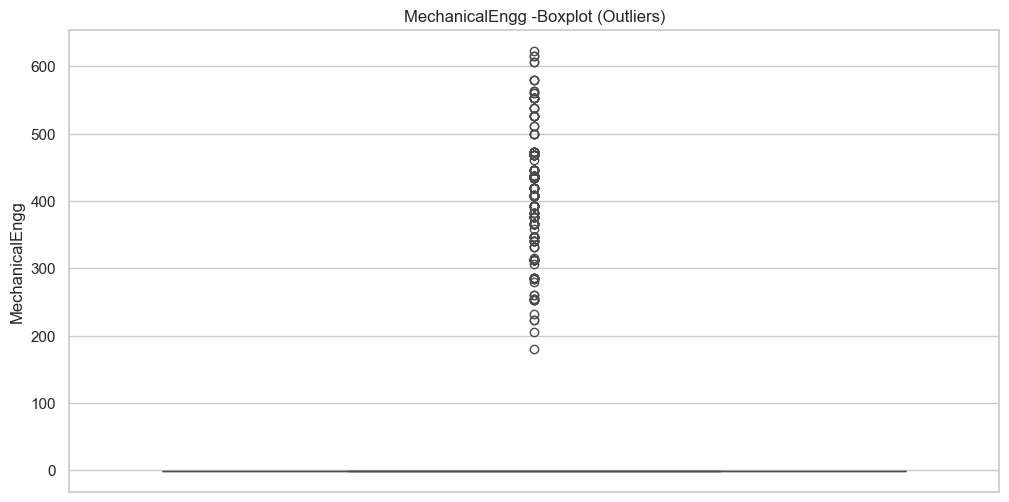

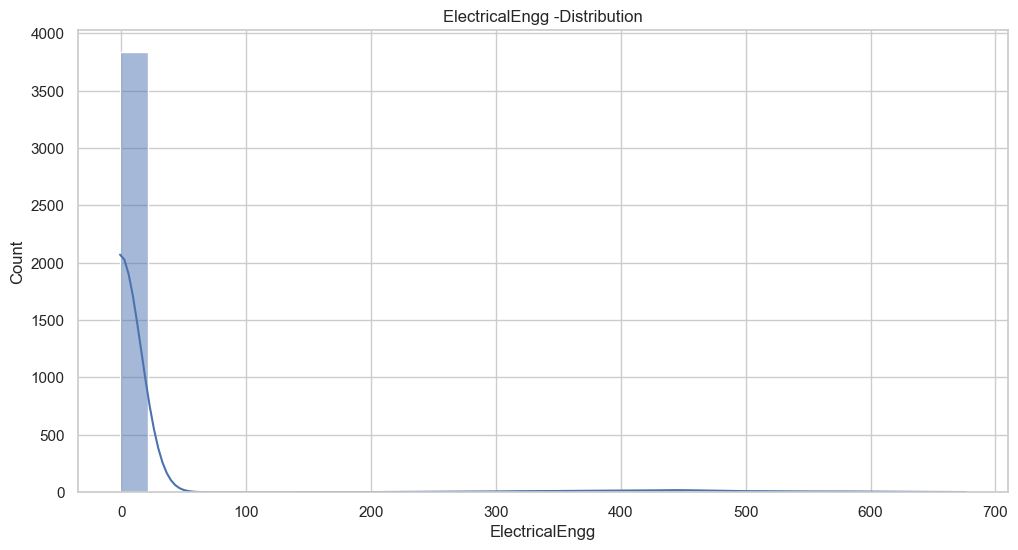

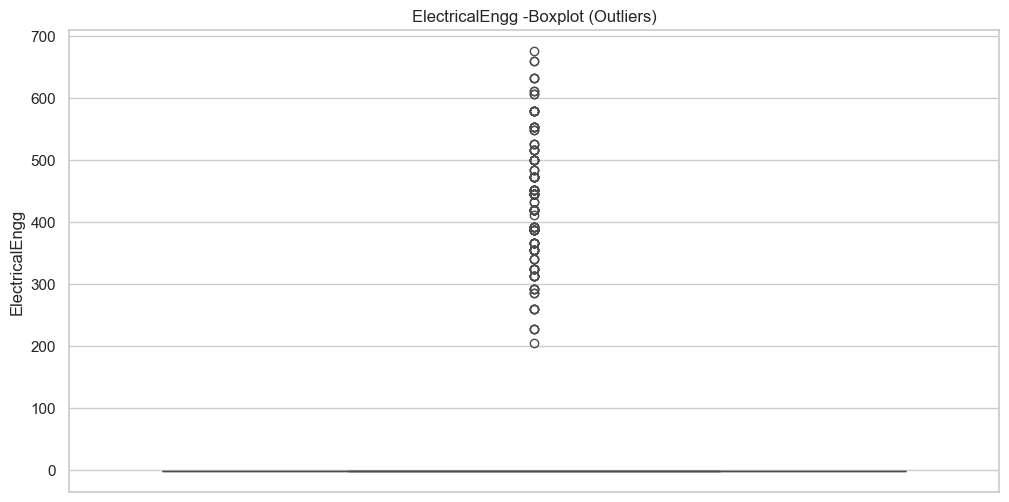

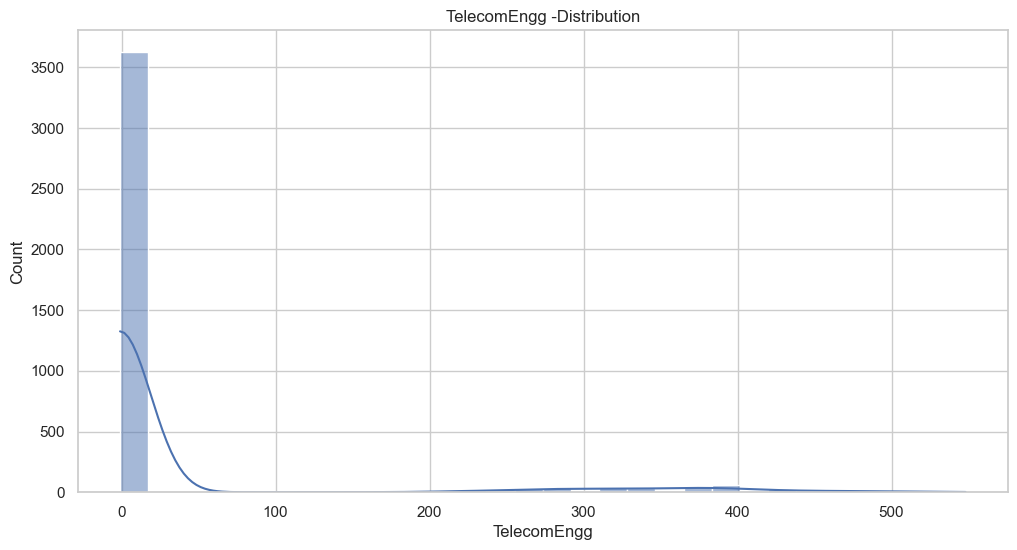

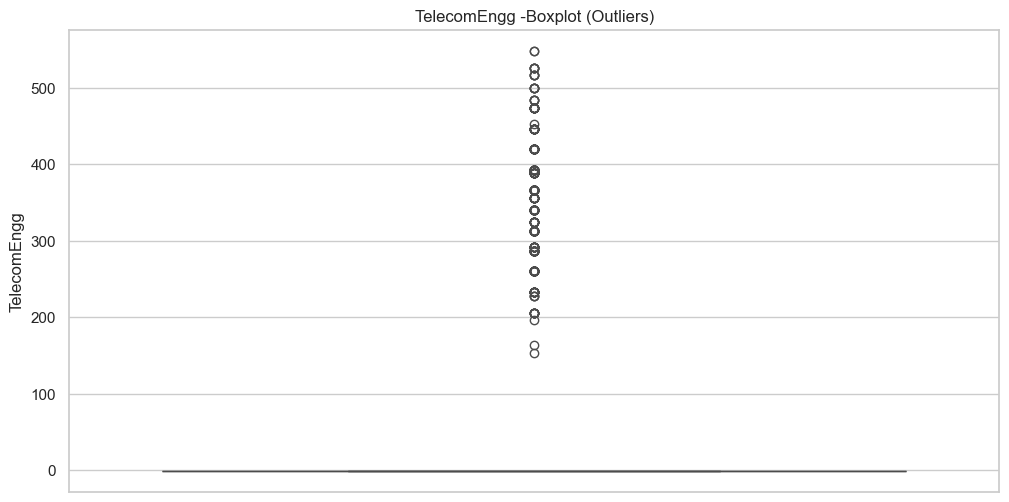

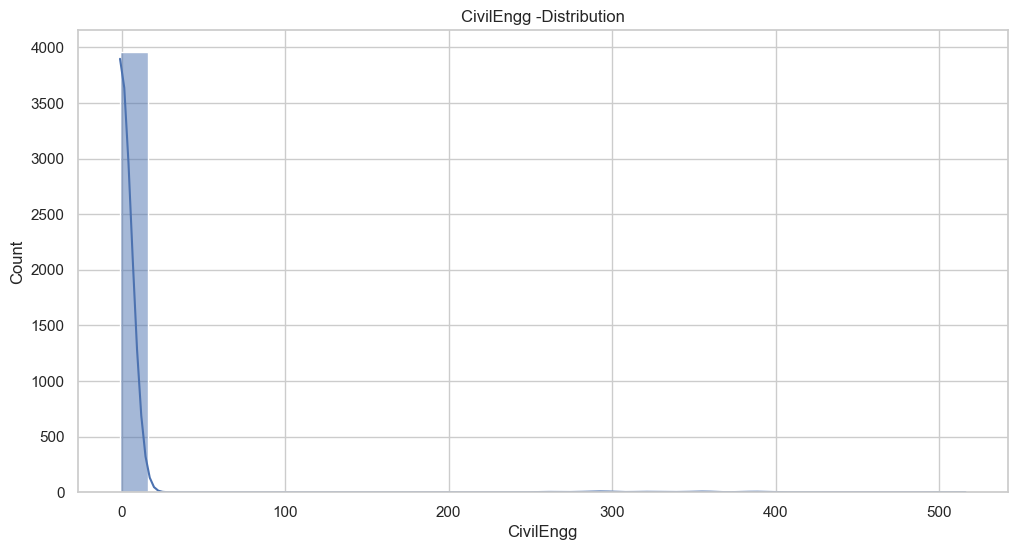

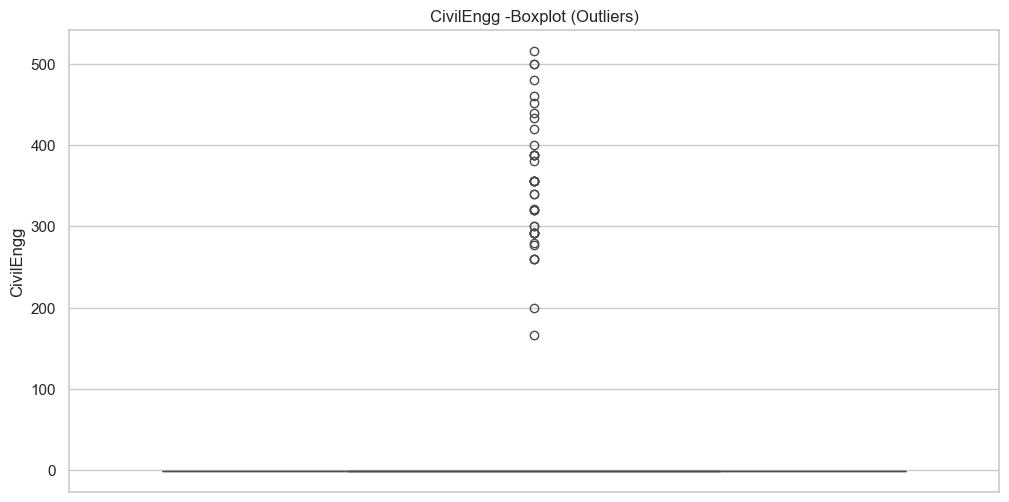

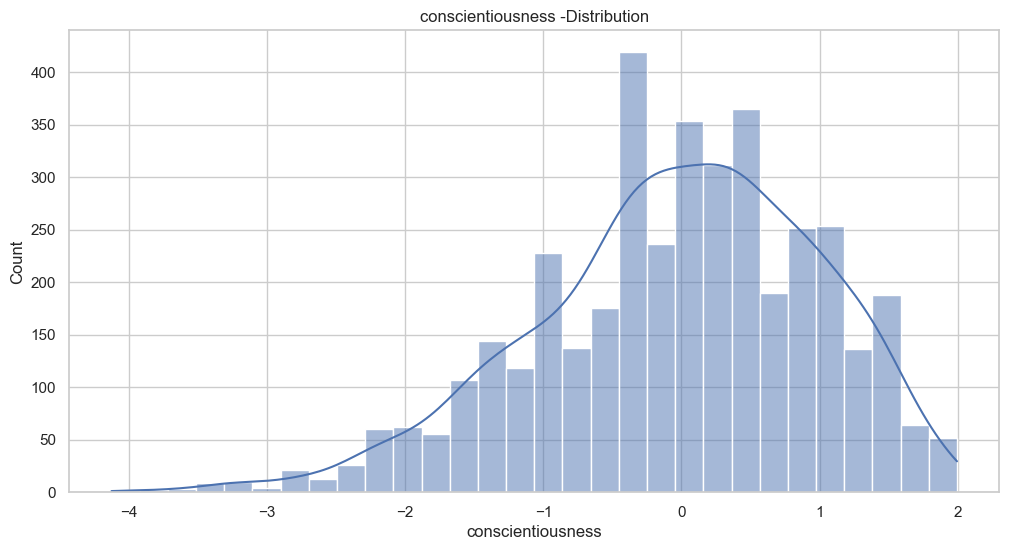

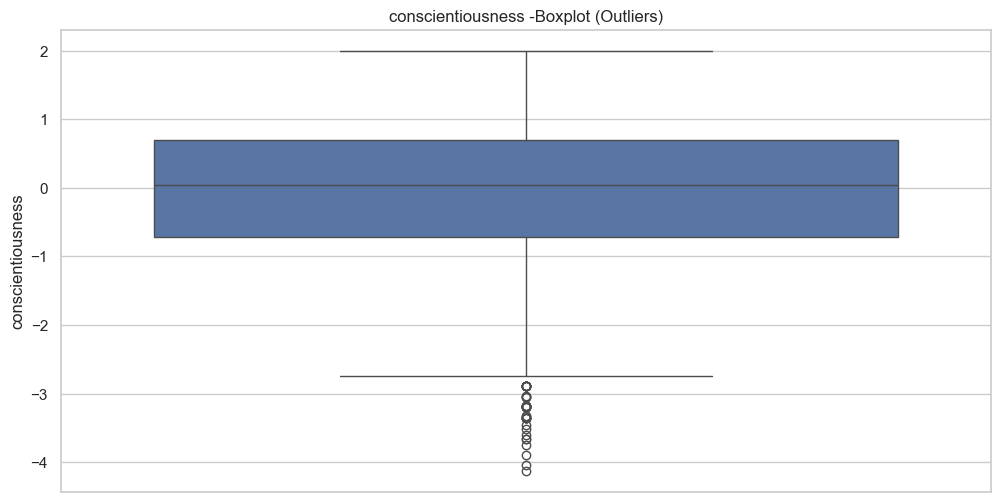

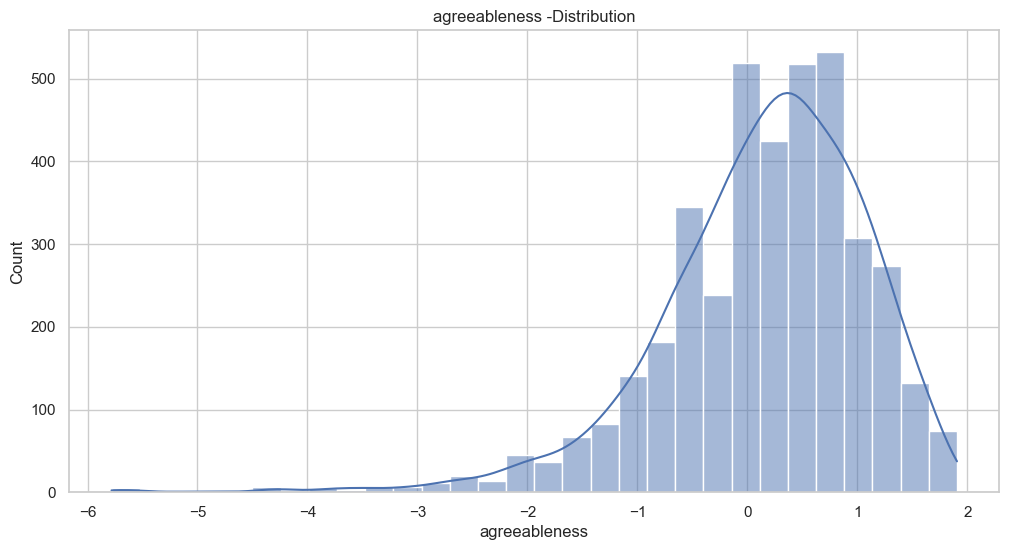

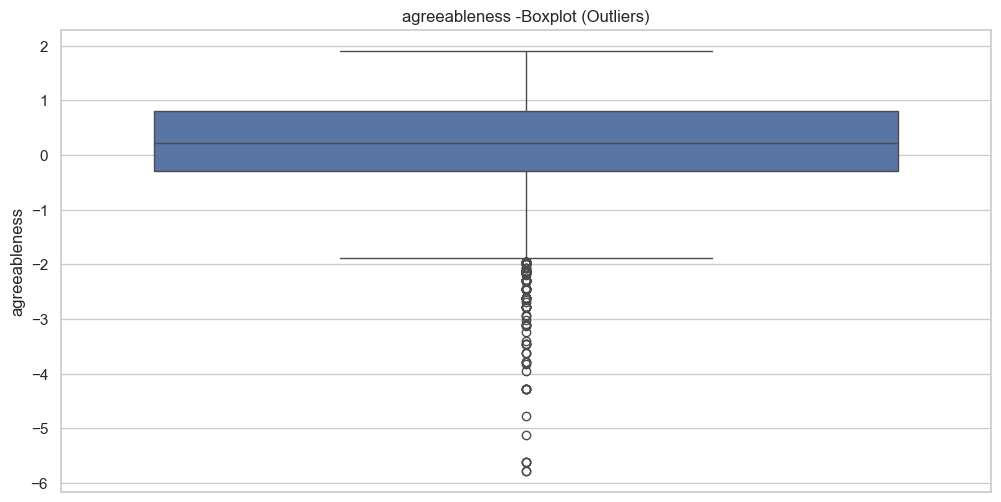

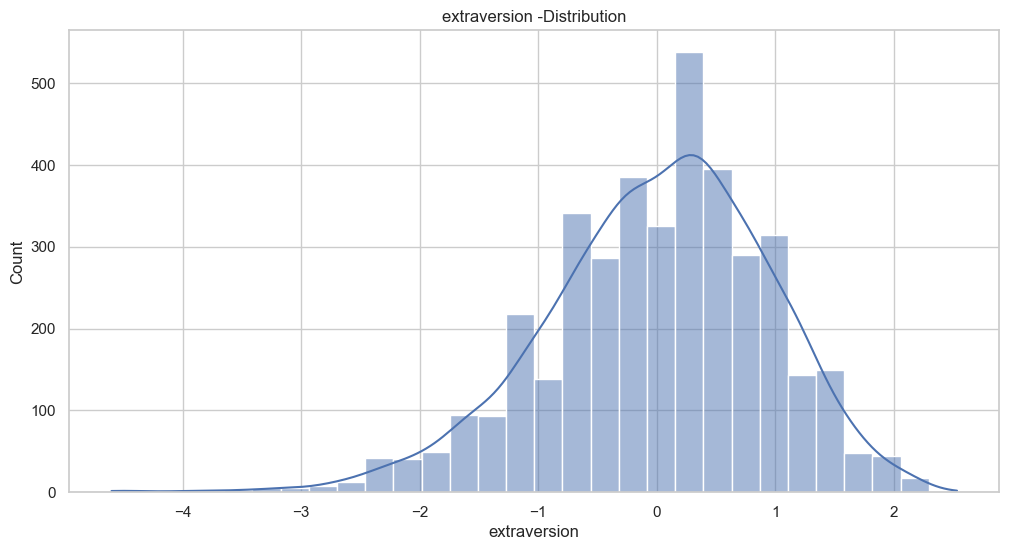

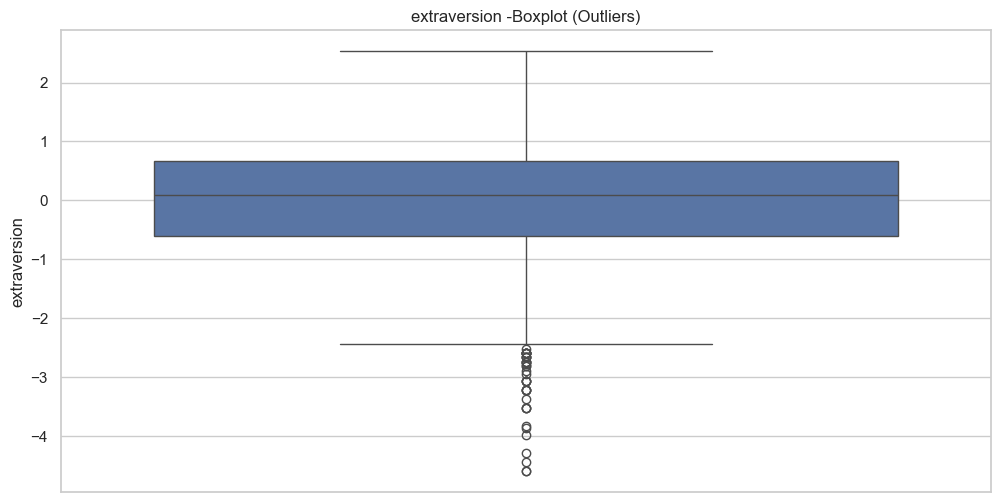

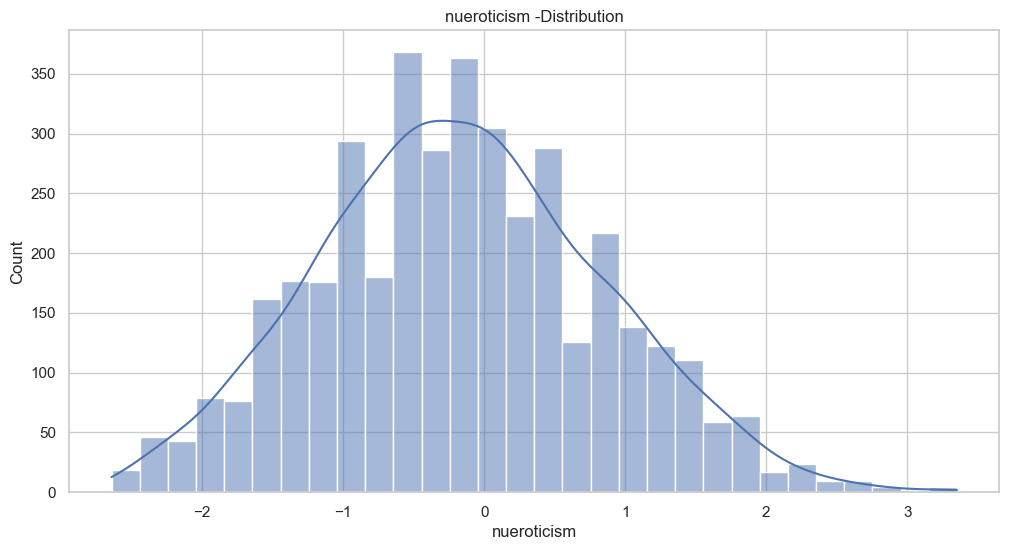

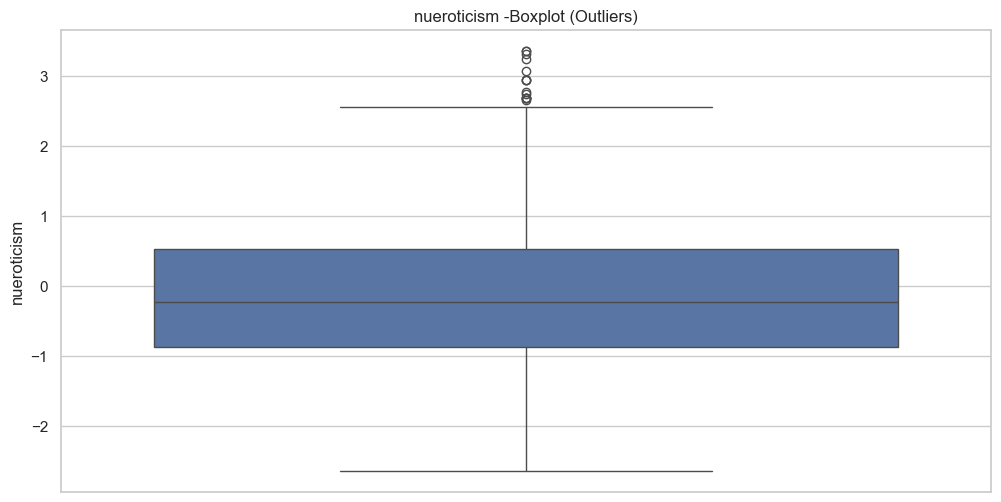

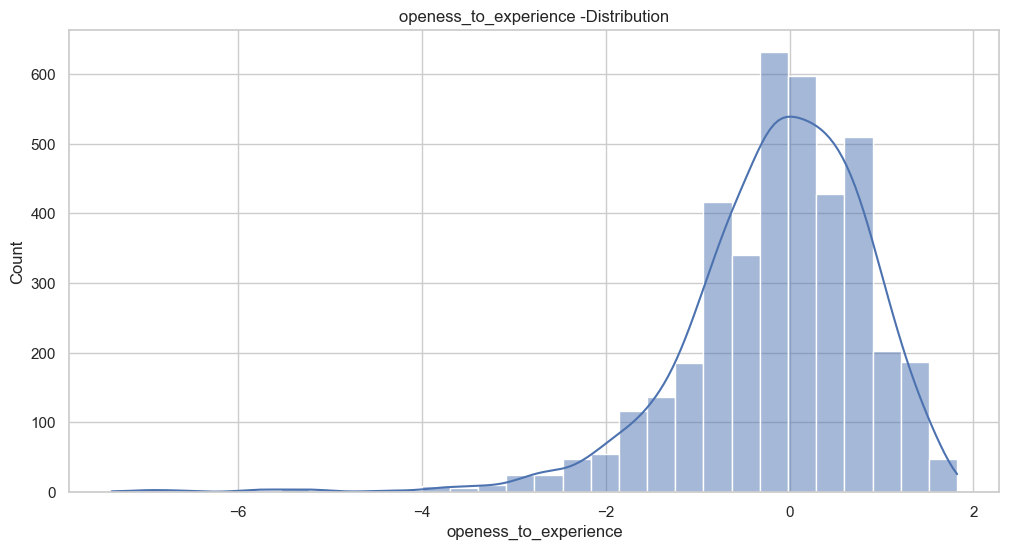

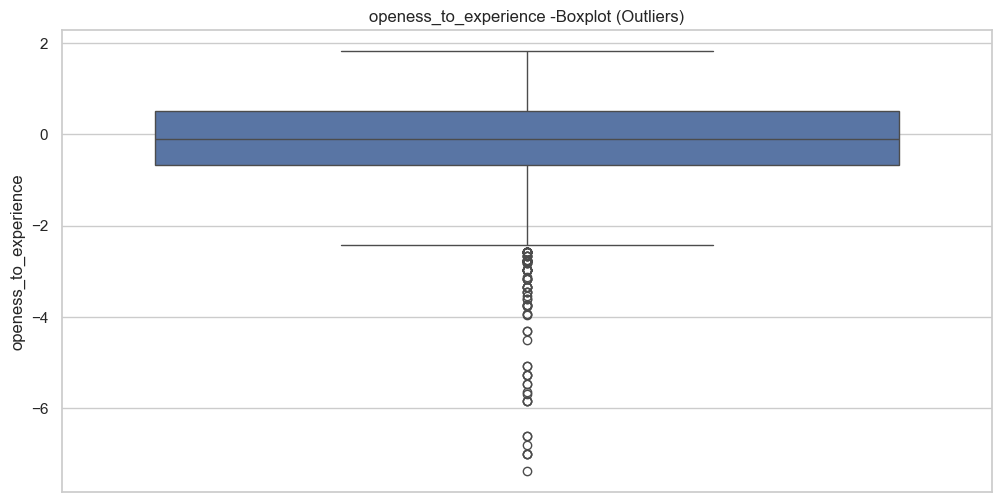

In [21]:
# List numerical columns (excluding Salary)
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = numerical_cols[numerical_cols != 'Salary']

# Histograms and Boxplots for other numerical columns
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], bins=30, kde=True,)
    plt.title(f'{col} -Distribution')
    plt.show()

    # Boxplot for detecting outliers
    plt.figure(figsize=(12, 6))
    sns.boxplot(y=df[col])
    plt.title(f'{col} -Boxplot (Outliers)')
    plt.show()

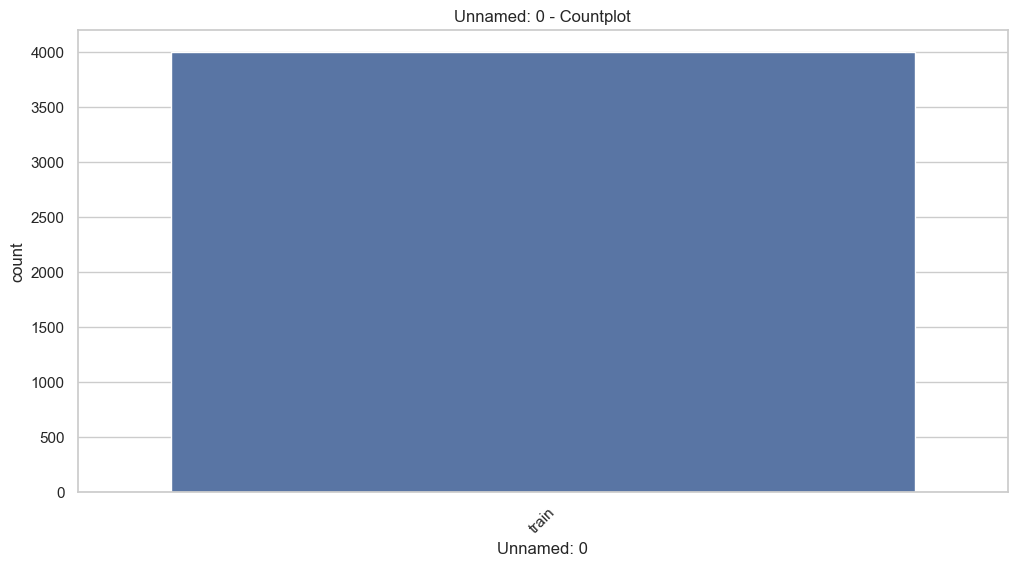

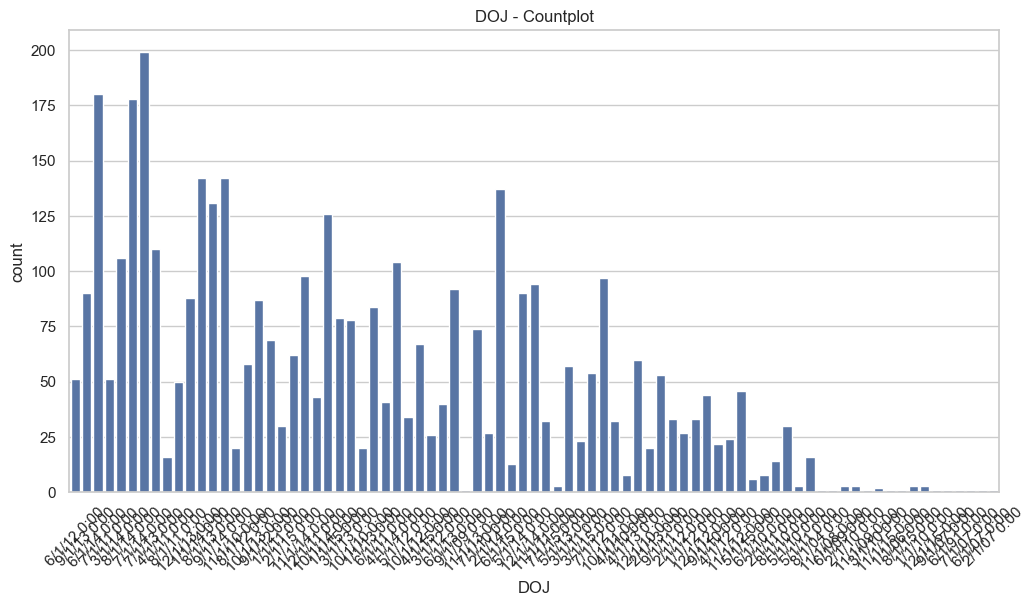

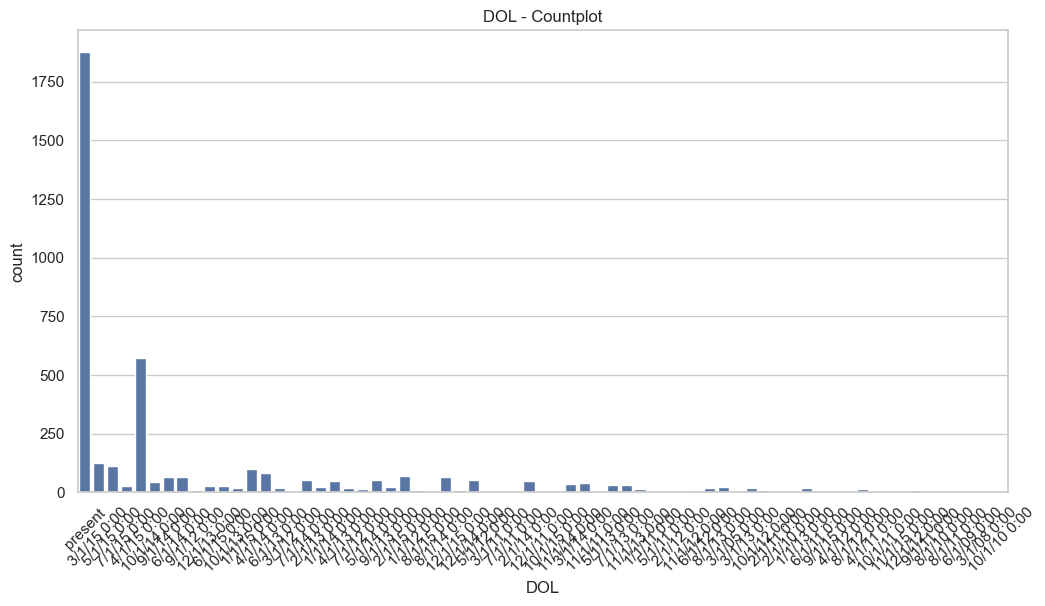

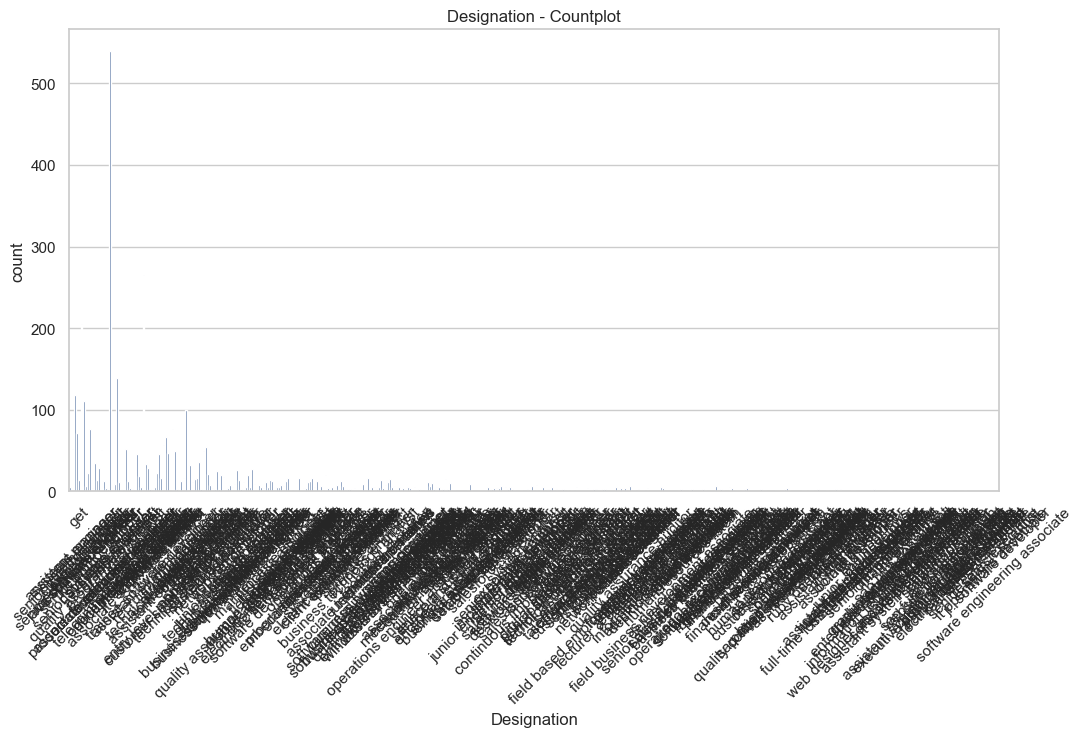

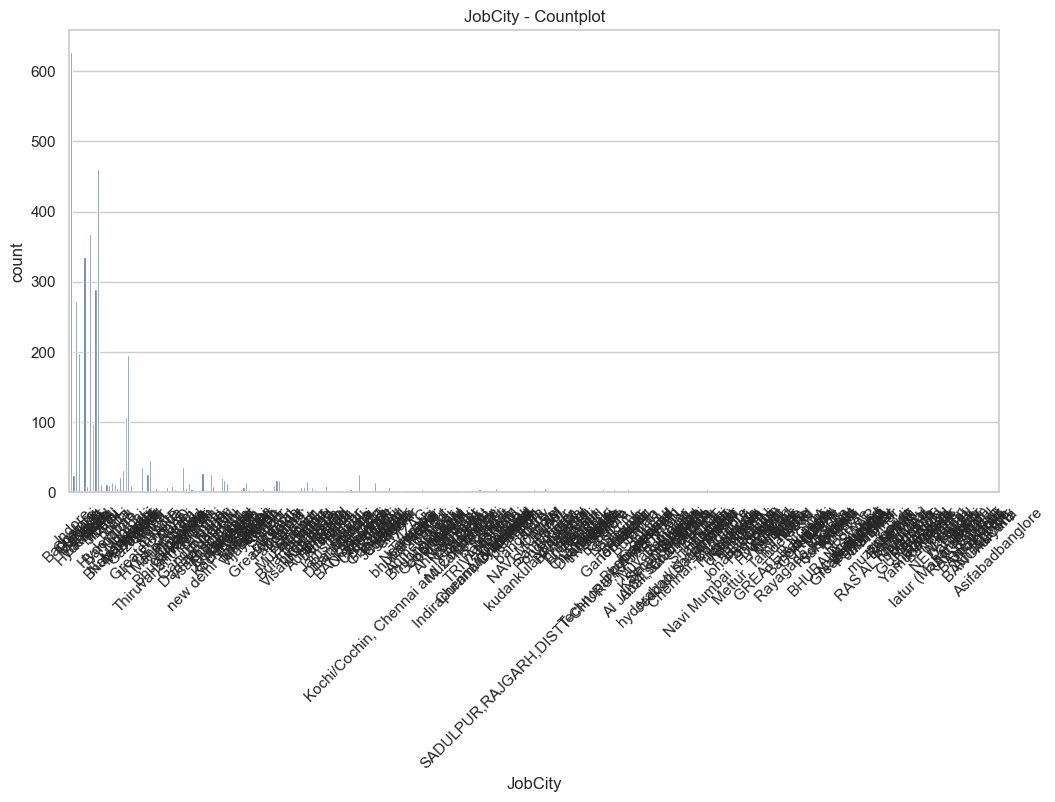

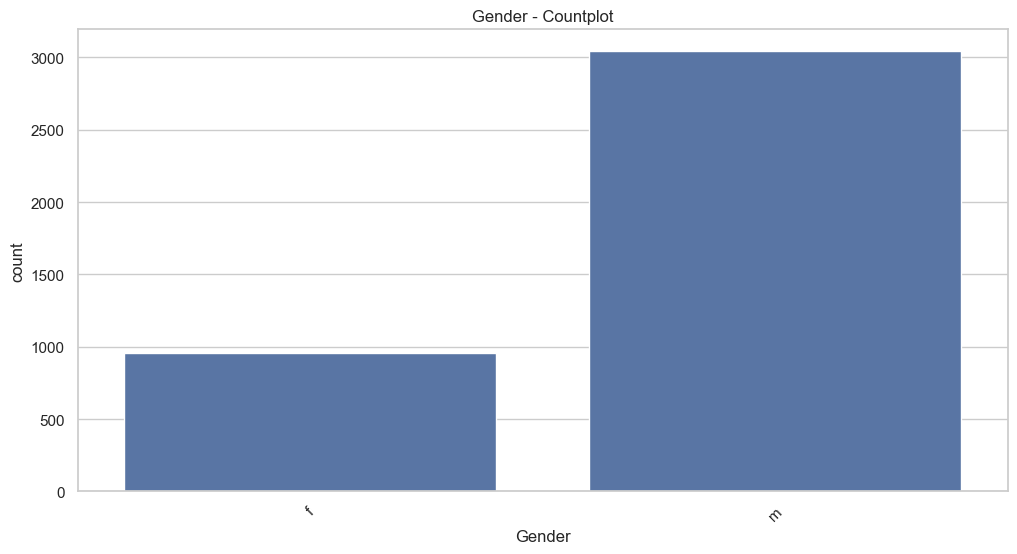

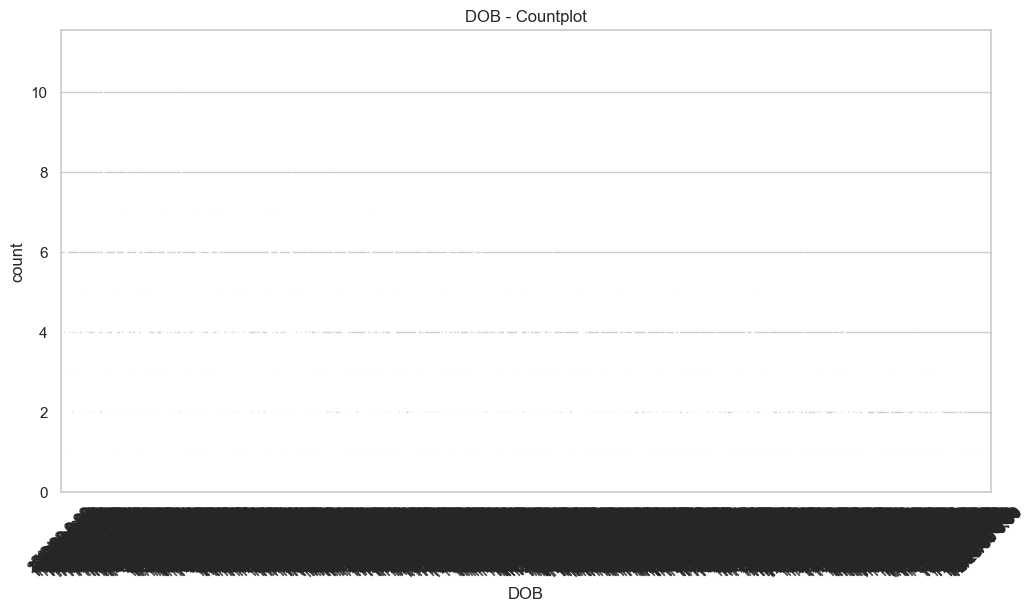

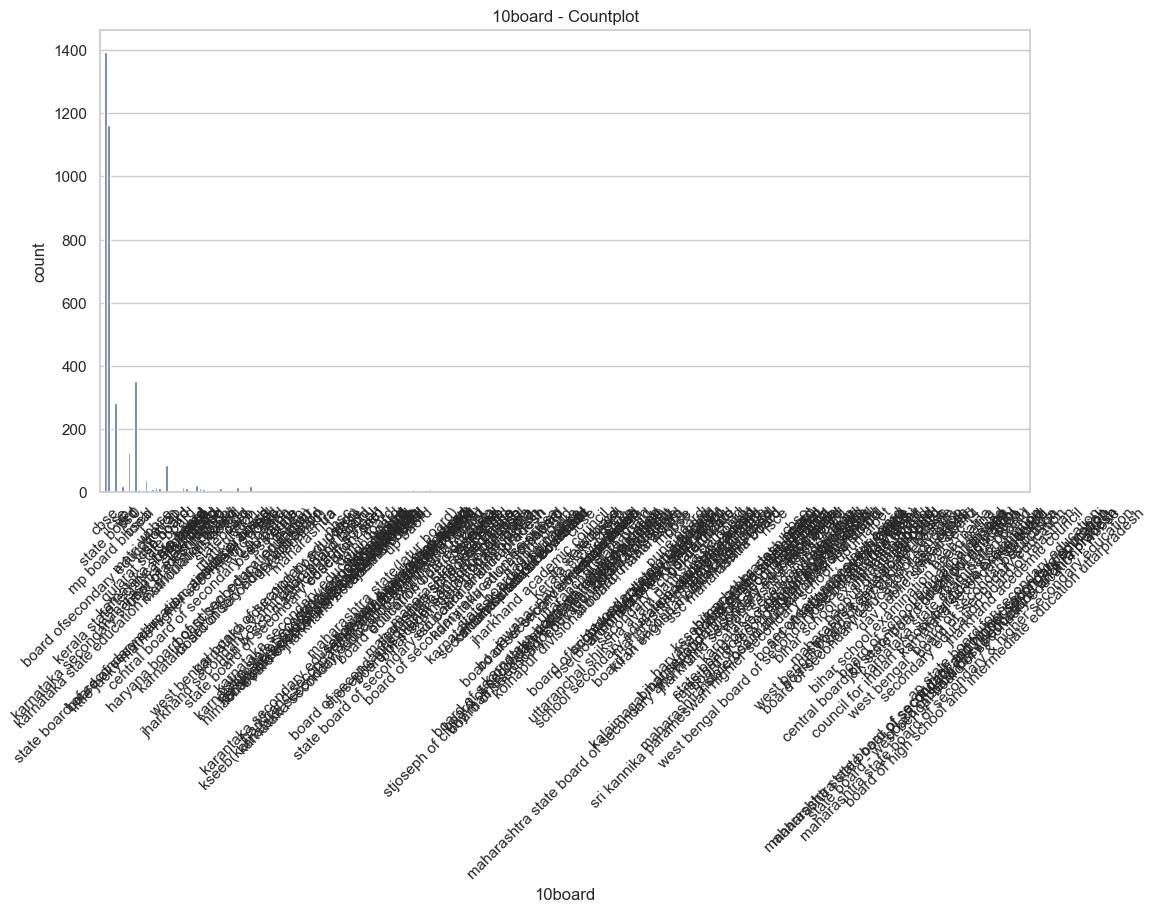

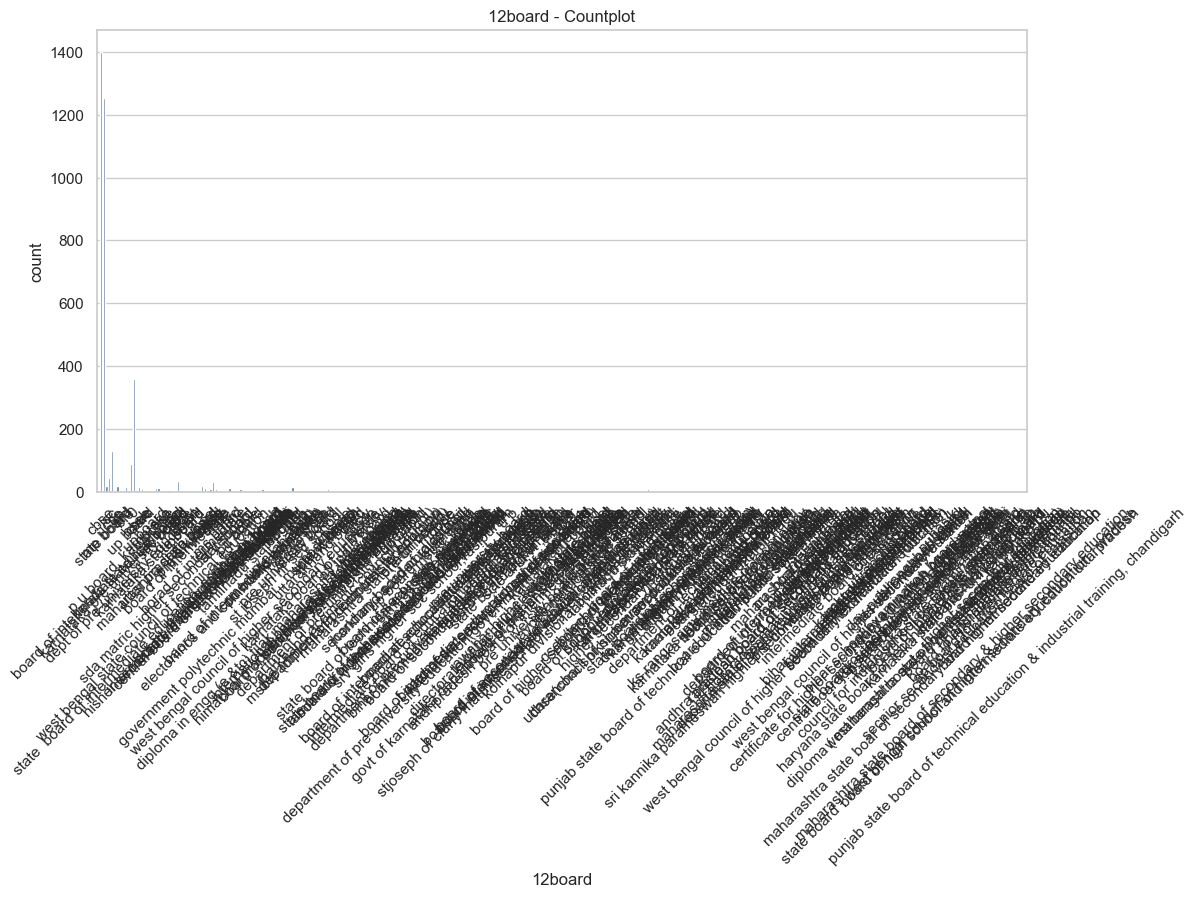

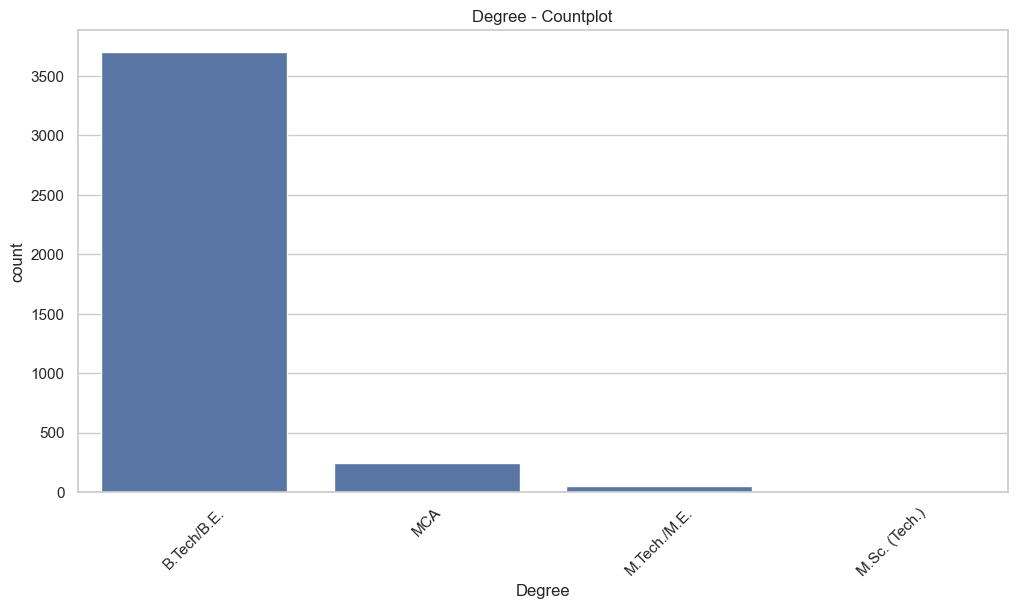

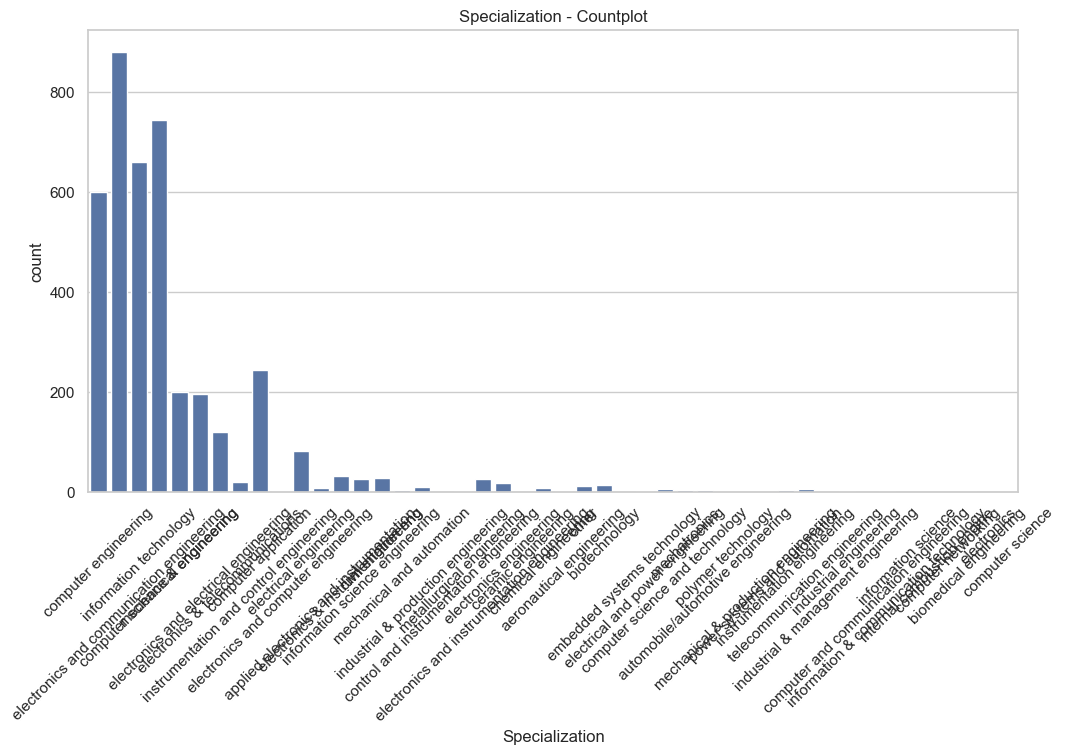

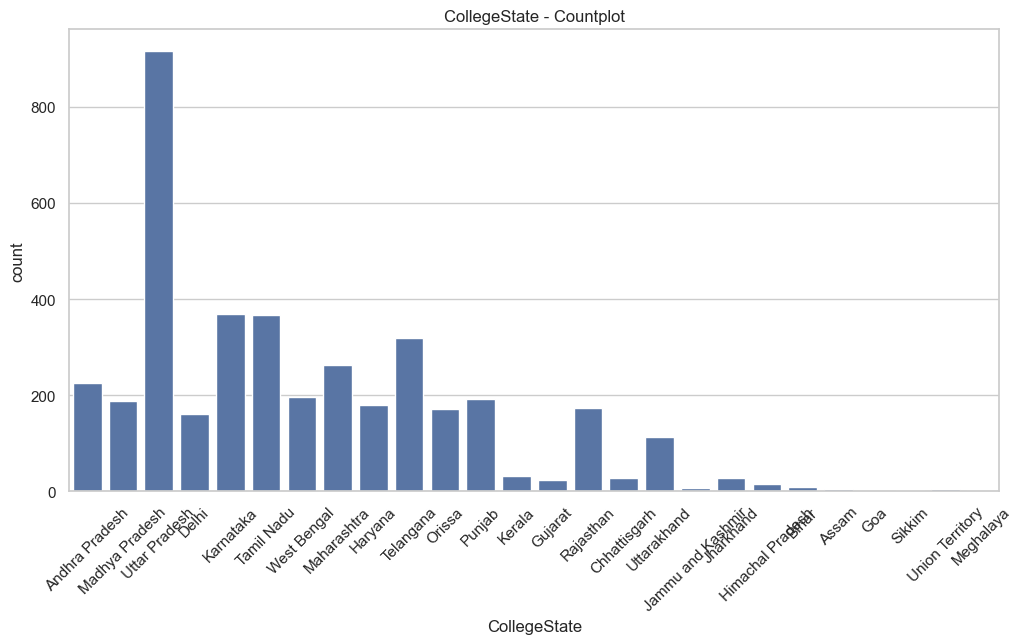

In [7]:
# Categorical columns (excluding Salary)
categorical_cols = df.select_dtypes(include=['object']).columns

# Countplot for each categorical feature (excluding Salary)
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=df[col])
    plt.title(f'{col} - Countplot')
    plt.xticks(rotation=45)
    plt.show()

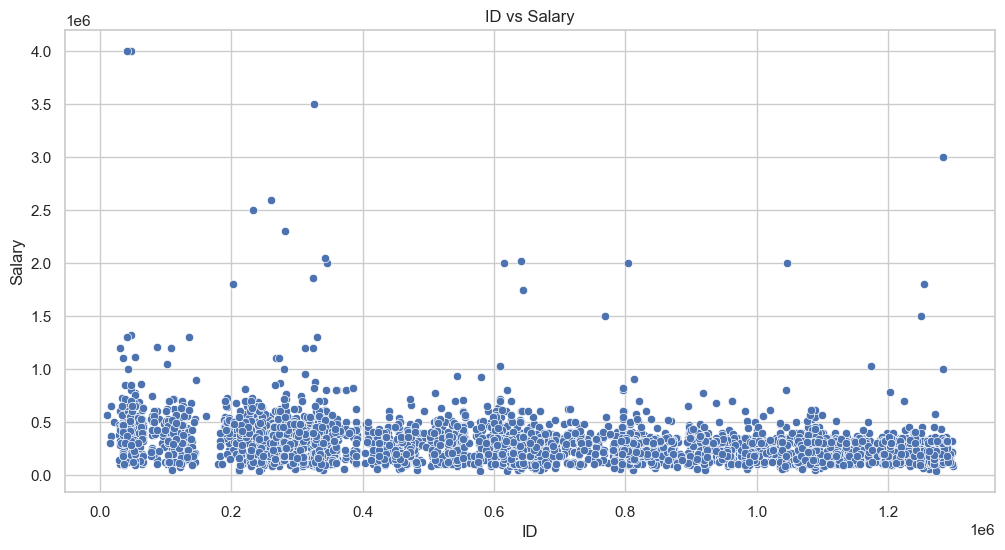

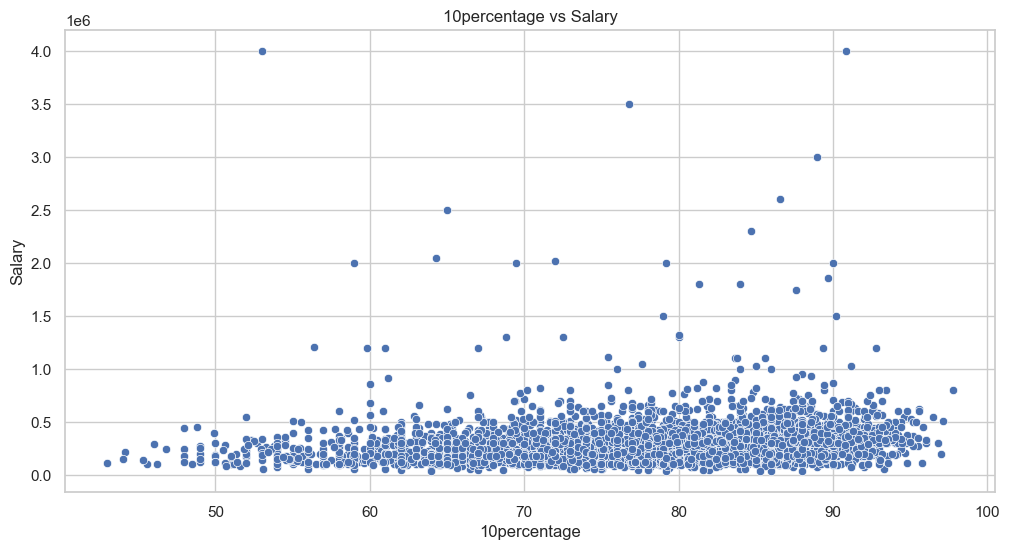

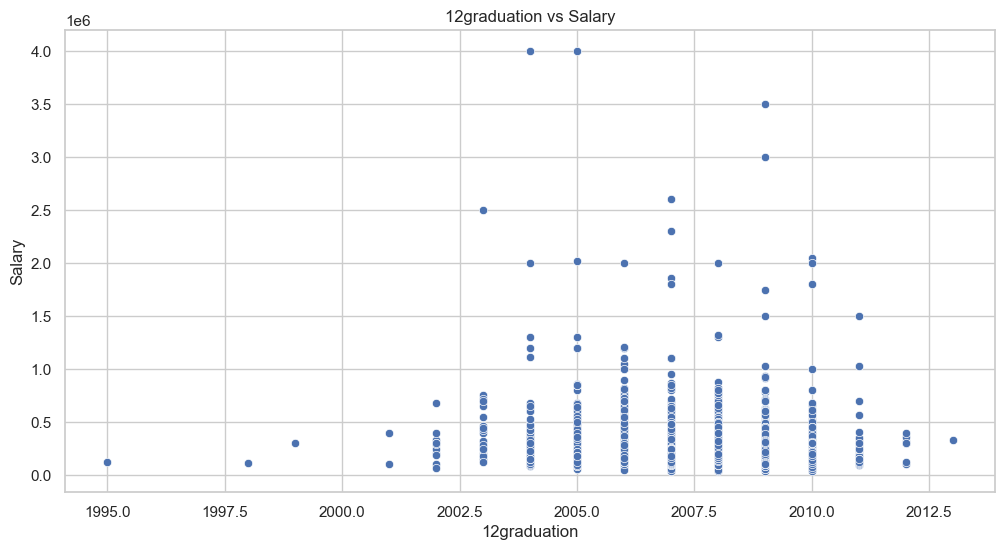

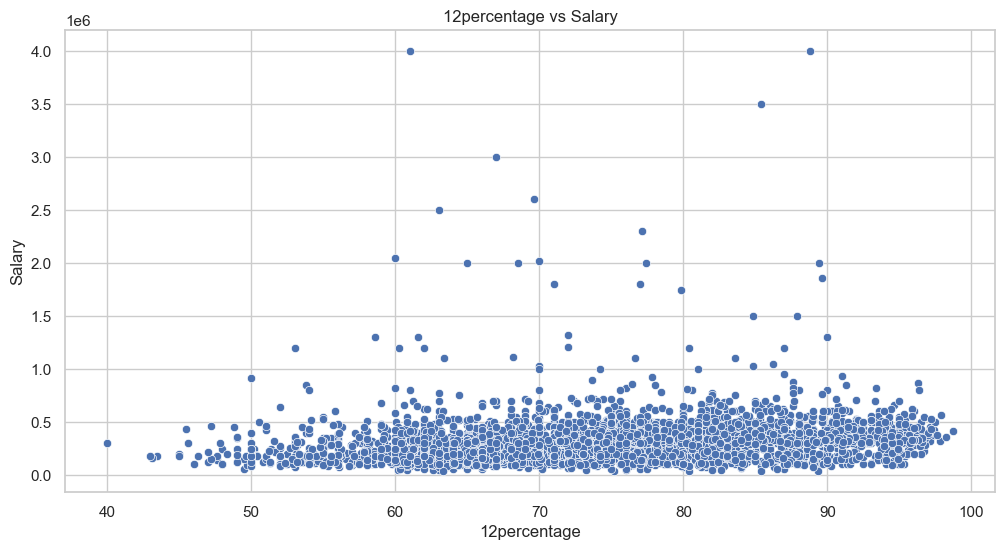

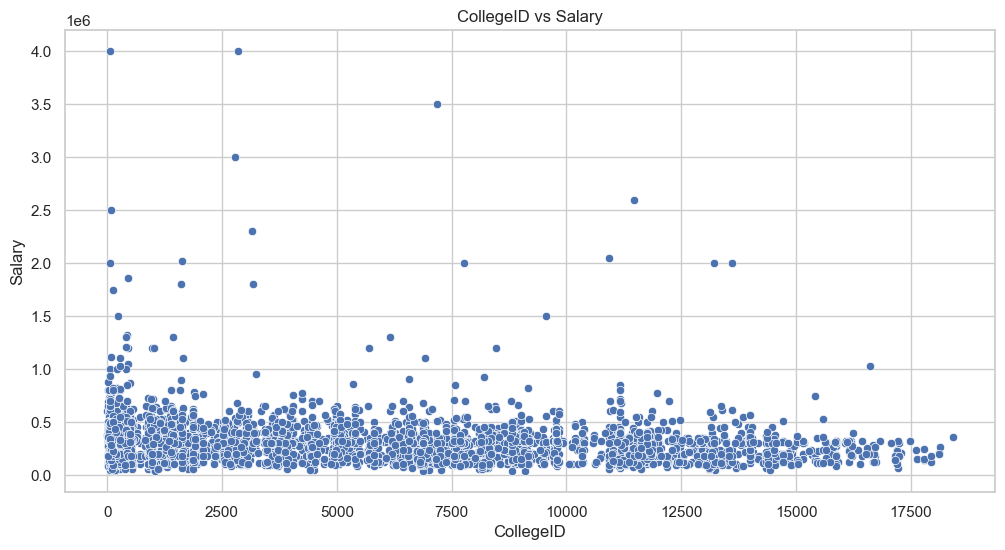

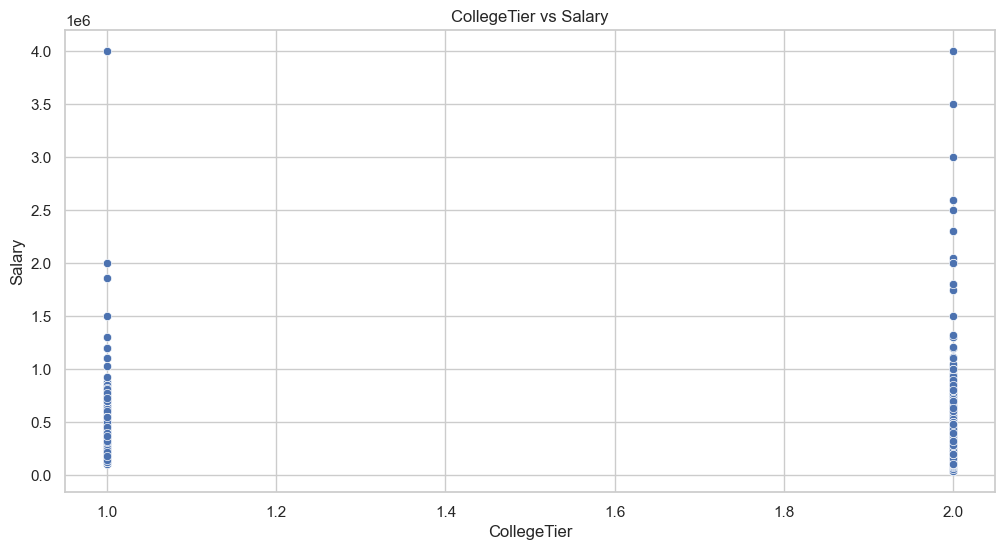

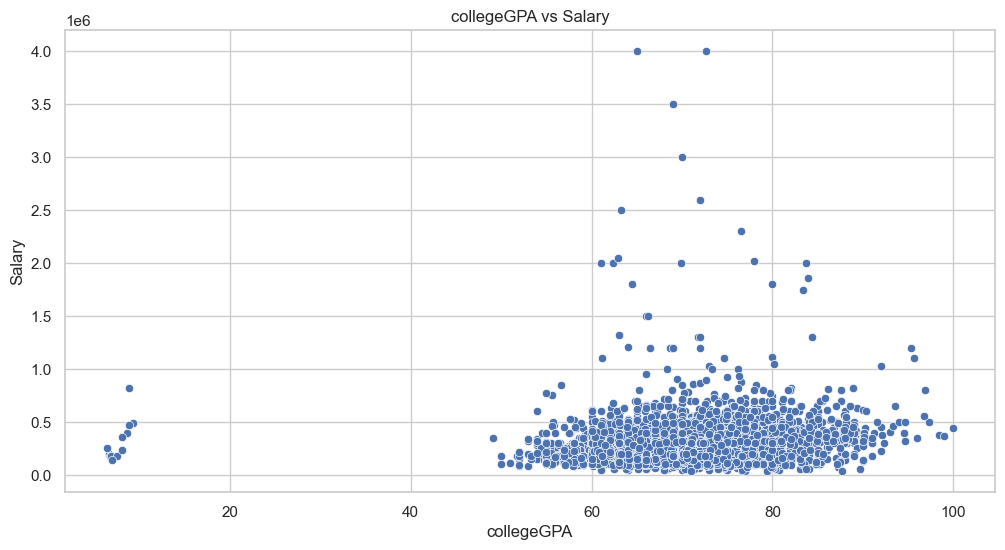

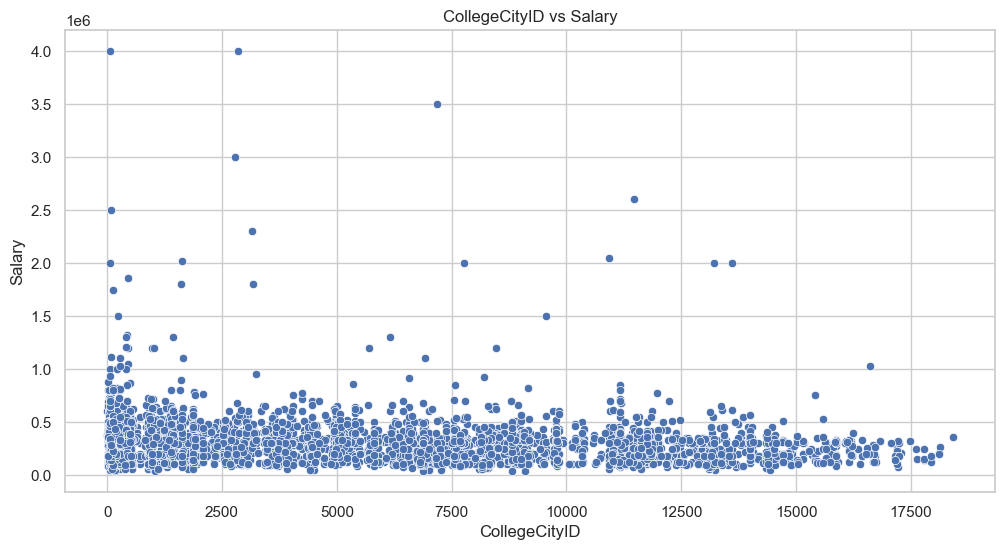

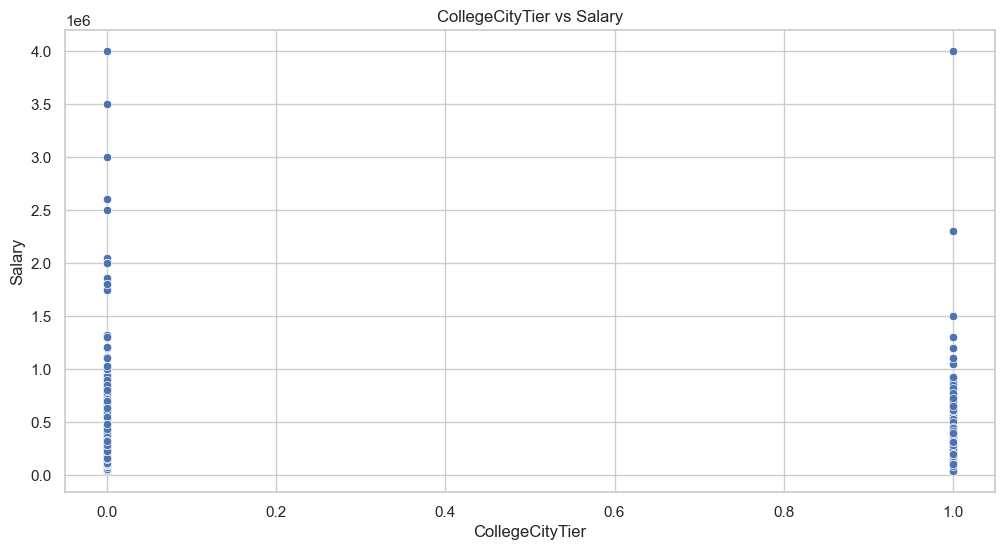

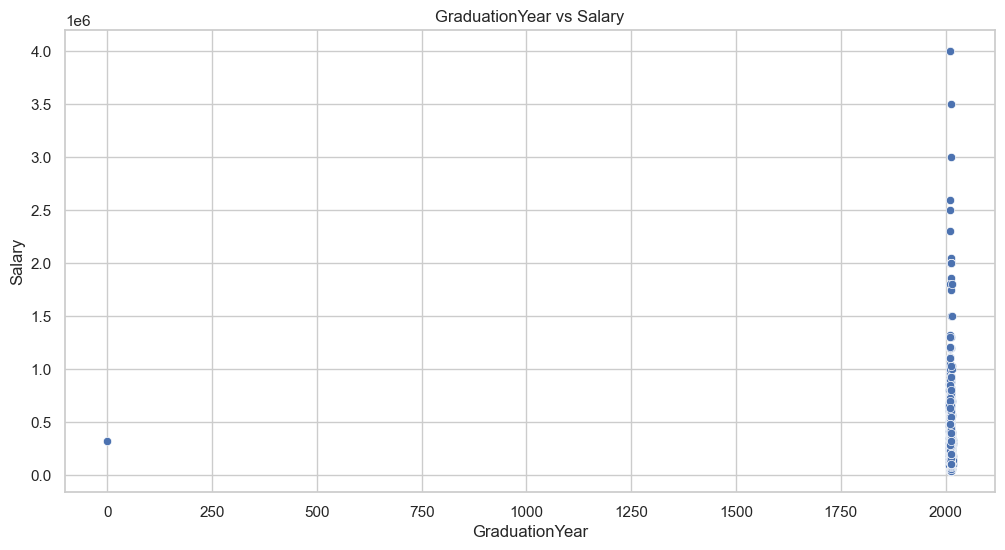

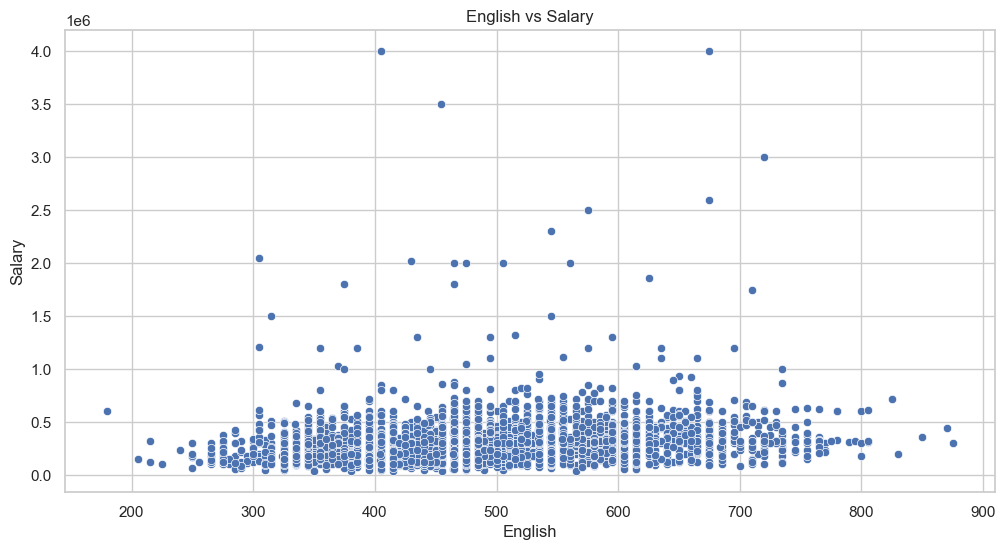

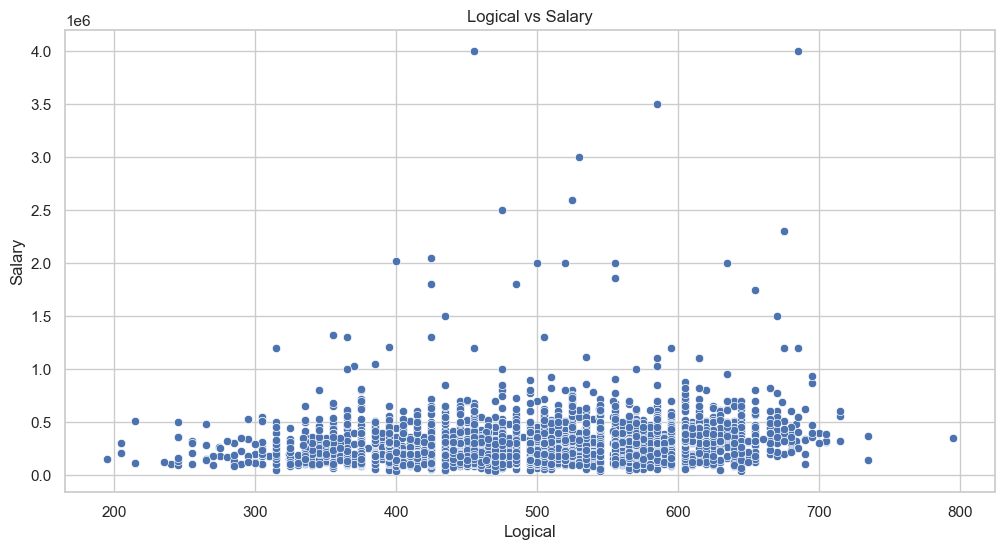

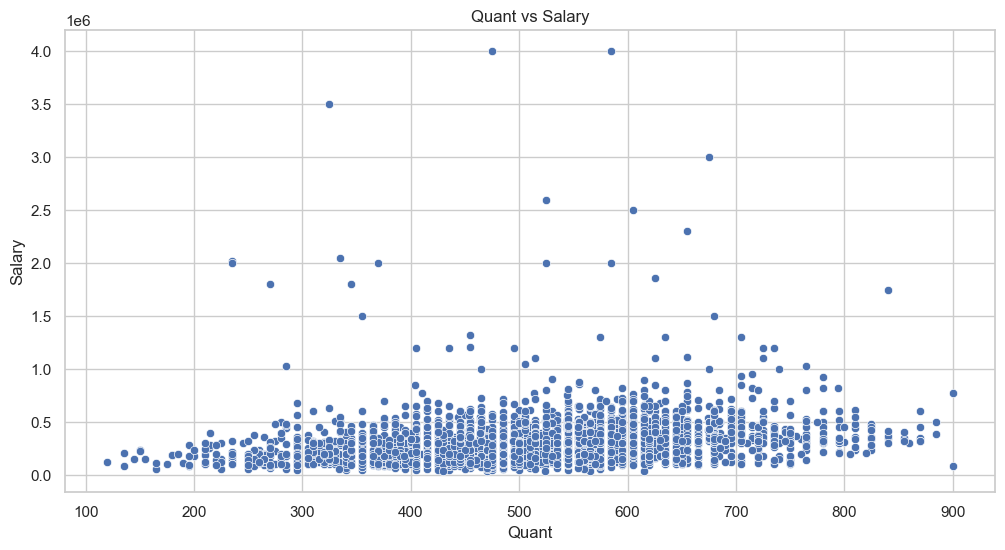

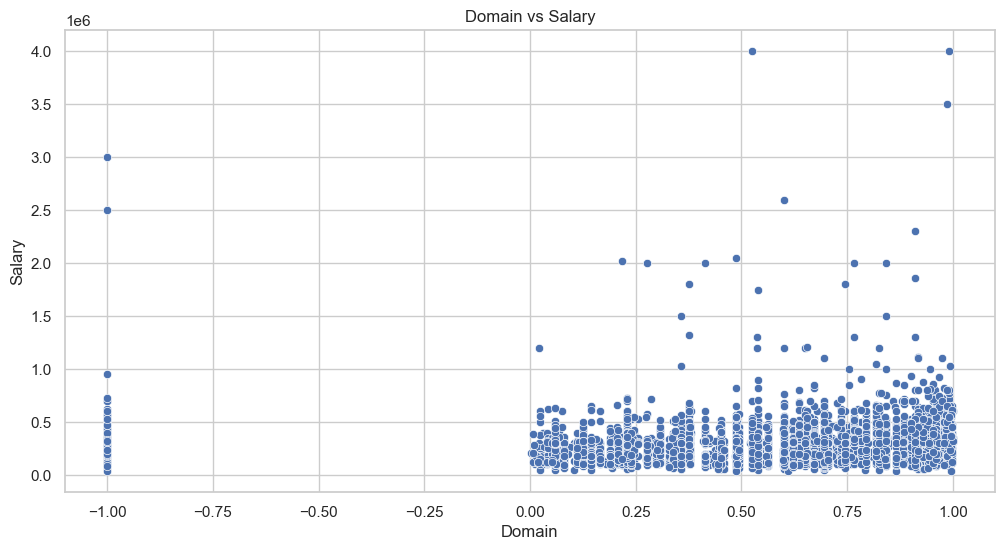

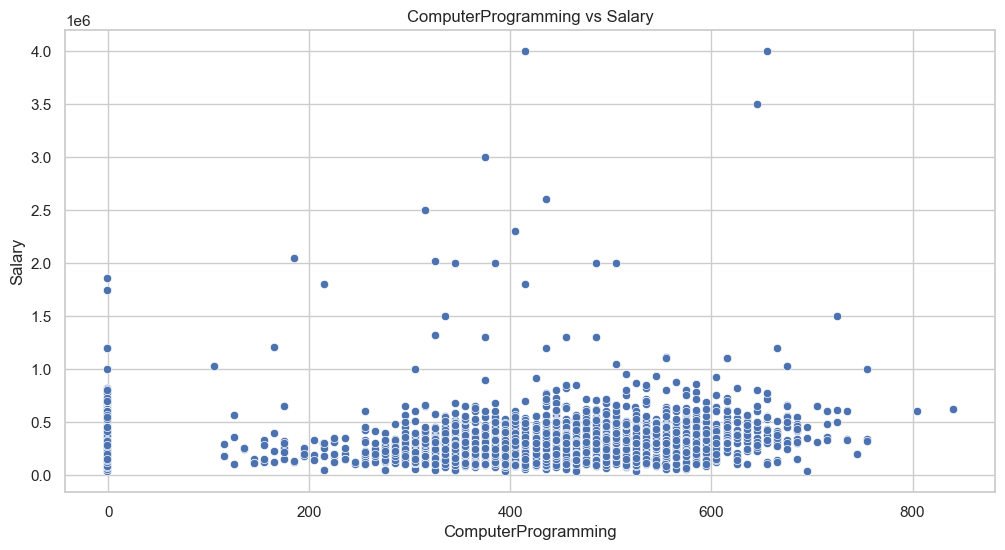

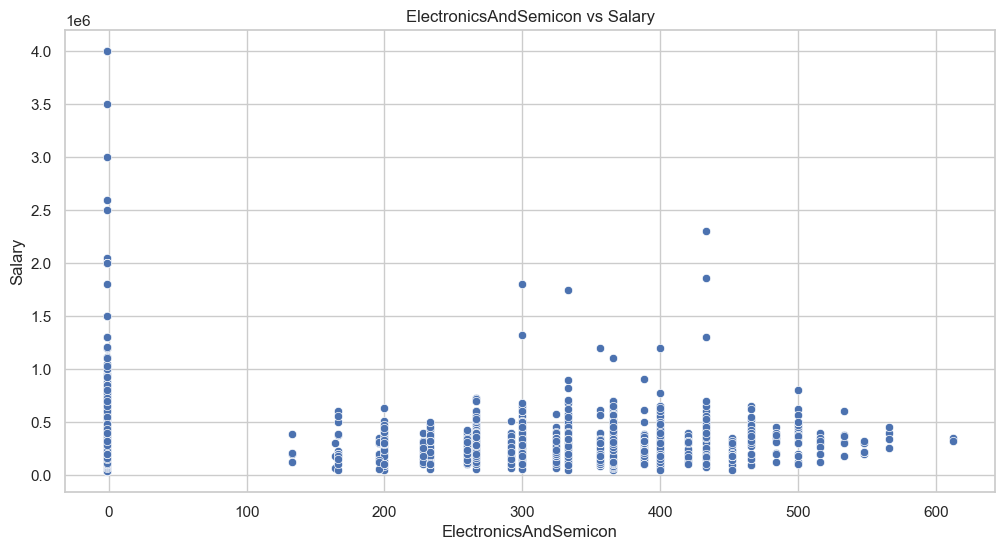

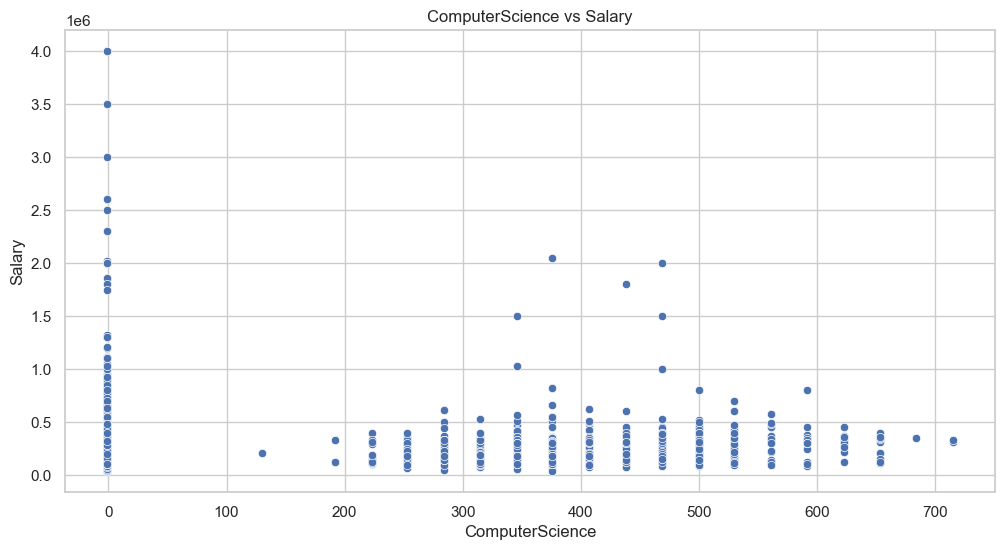

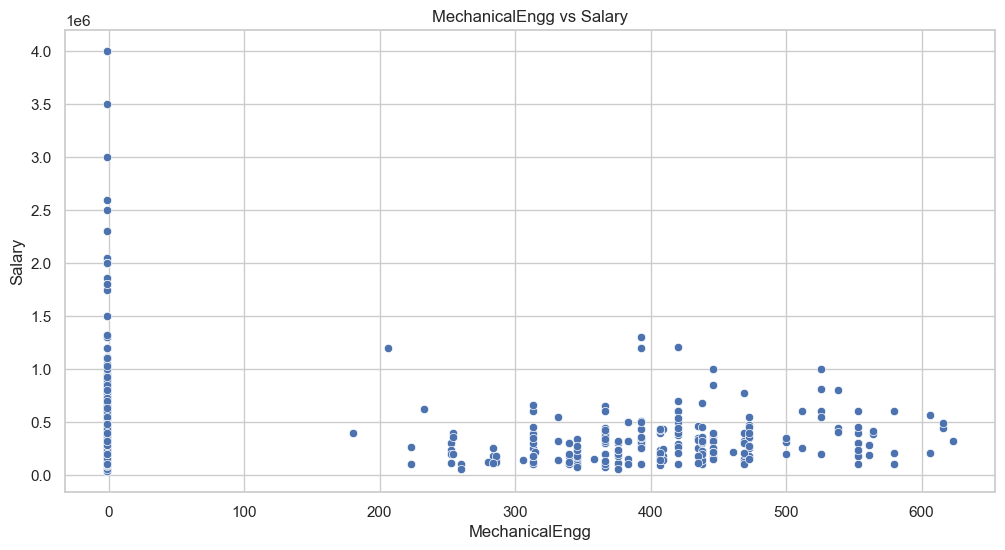

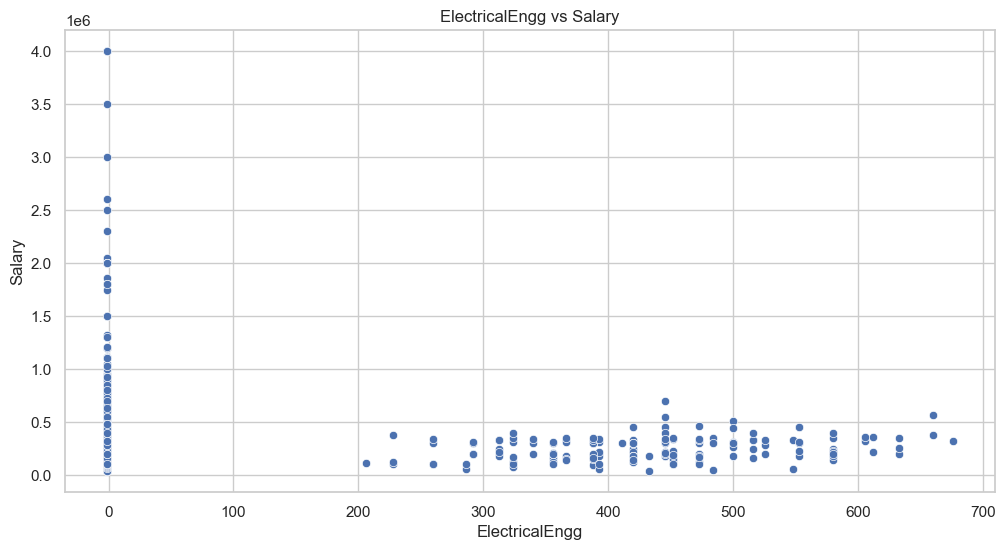

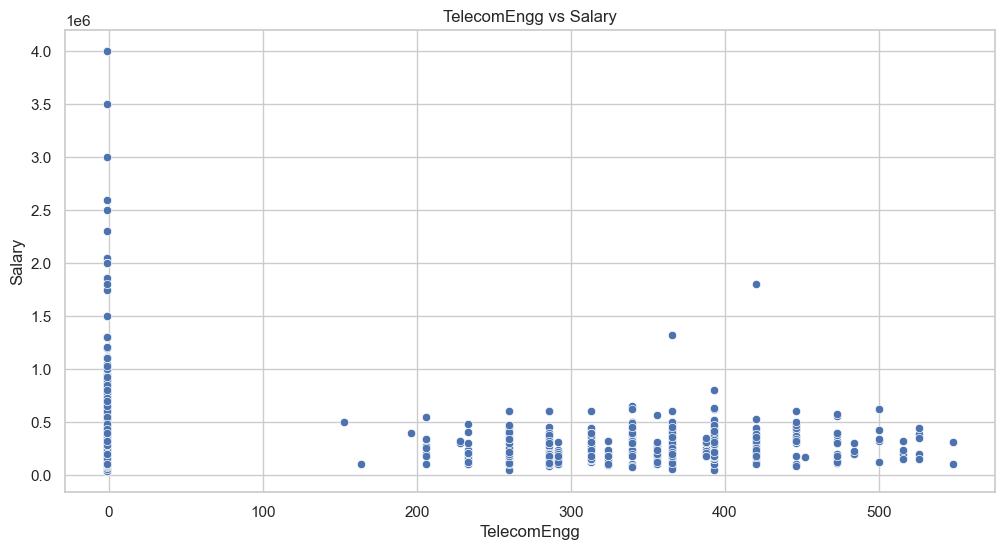

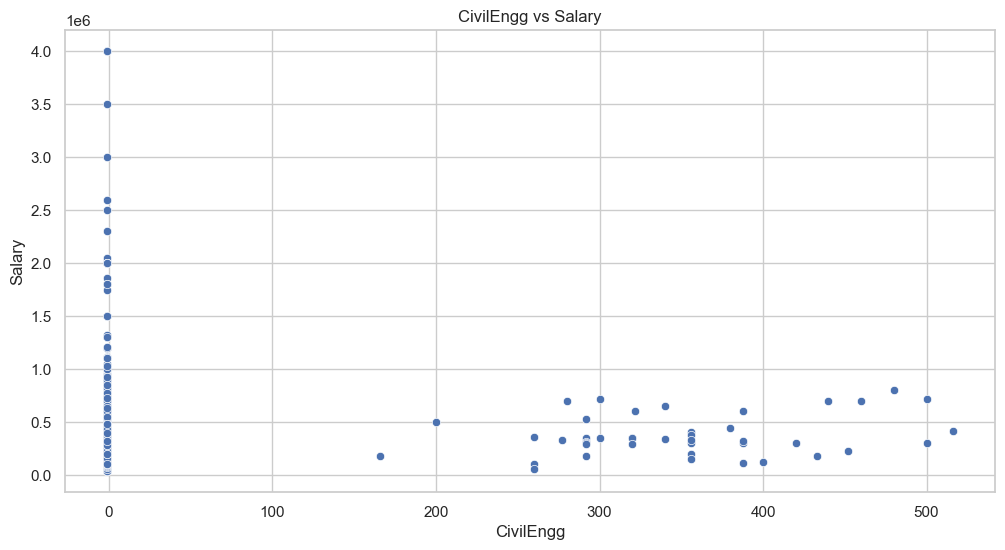

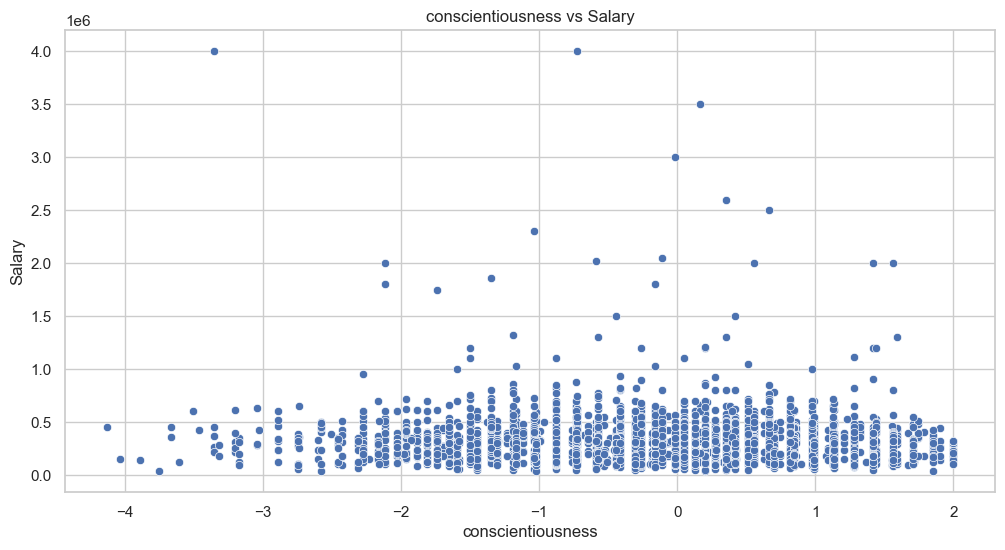

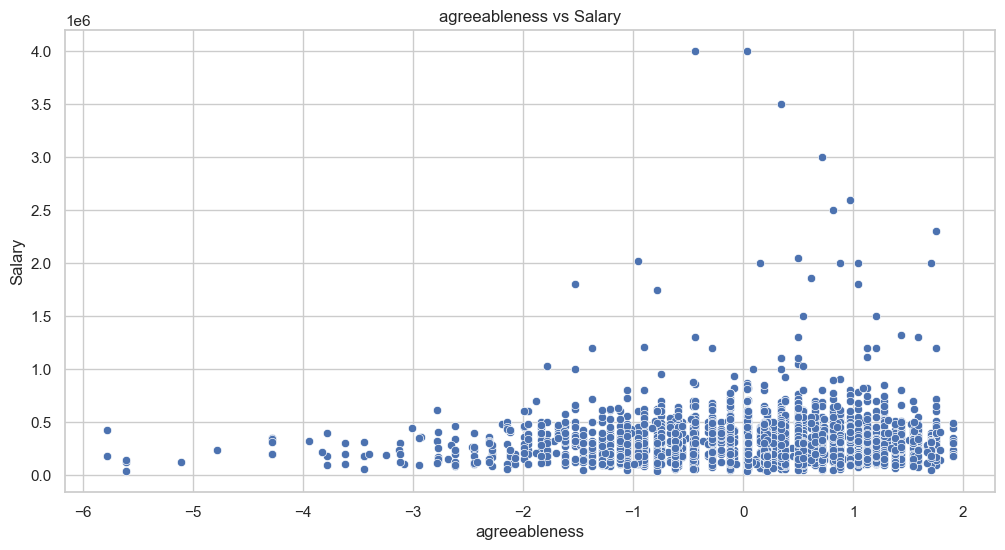

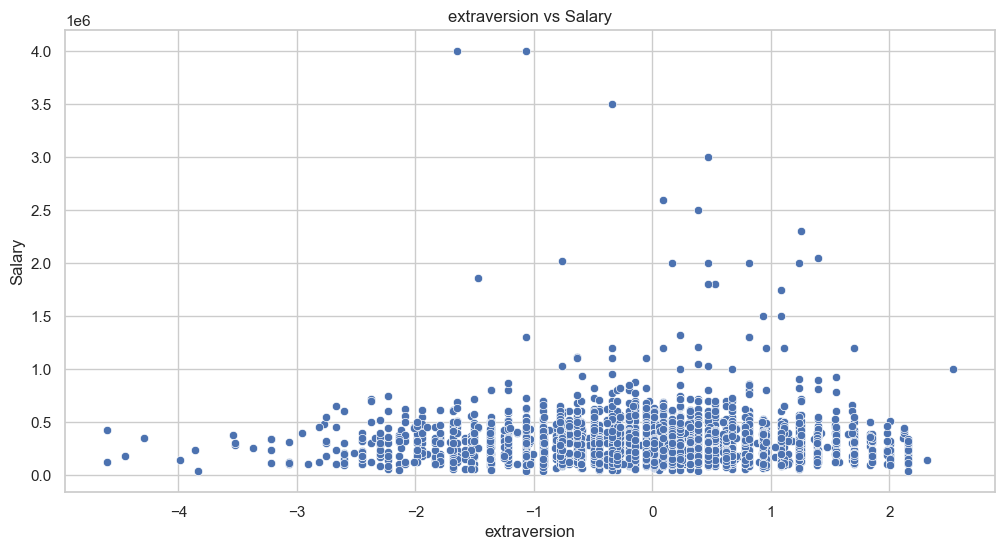

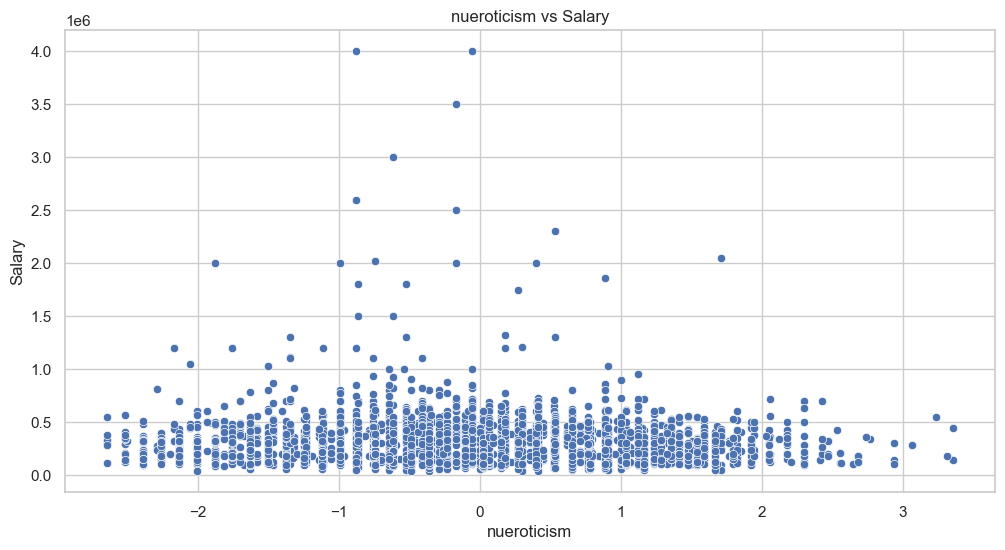

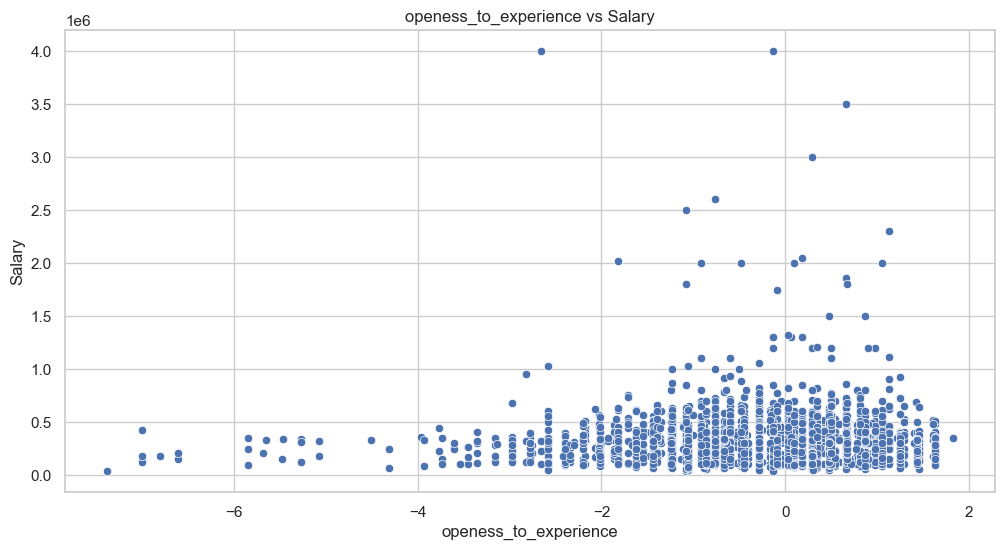

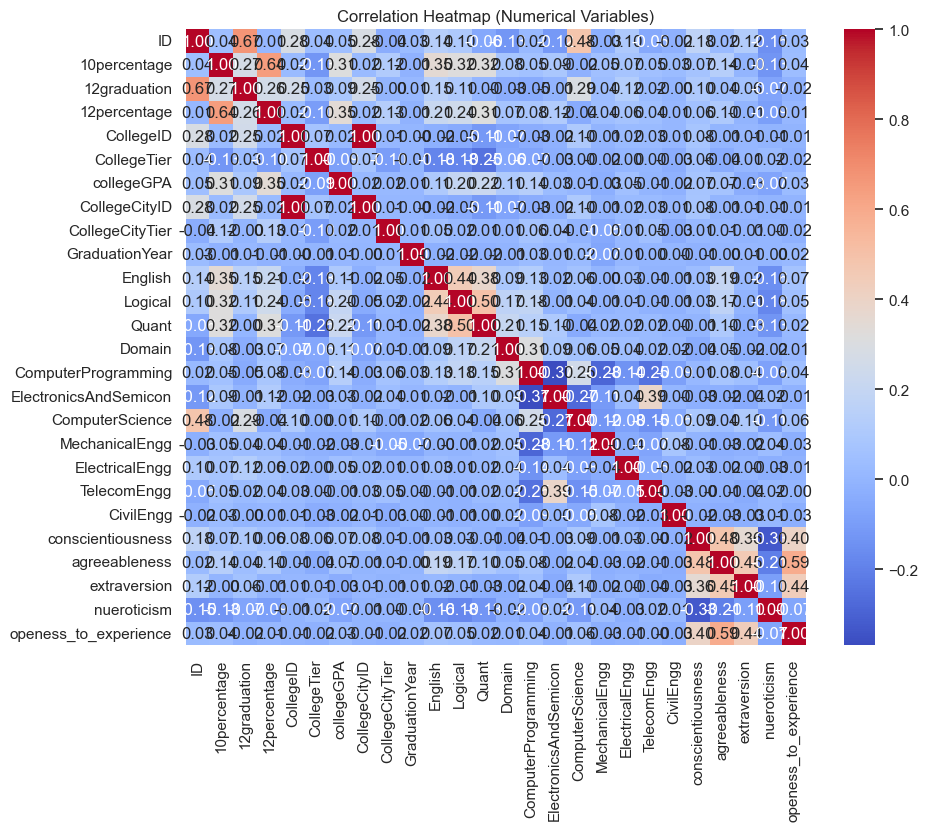

In [9]:
# Scatter plots between Salary and other numerical variables
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df[col], y=df['Salary'])
    plt.title(f'{col} vs Salary')
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.show()

# Correlation heatmap to check numerical variables' correlation with Salary
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

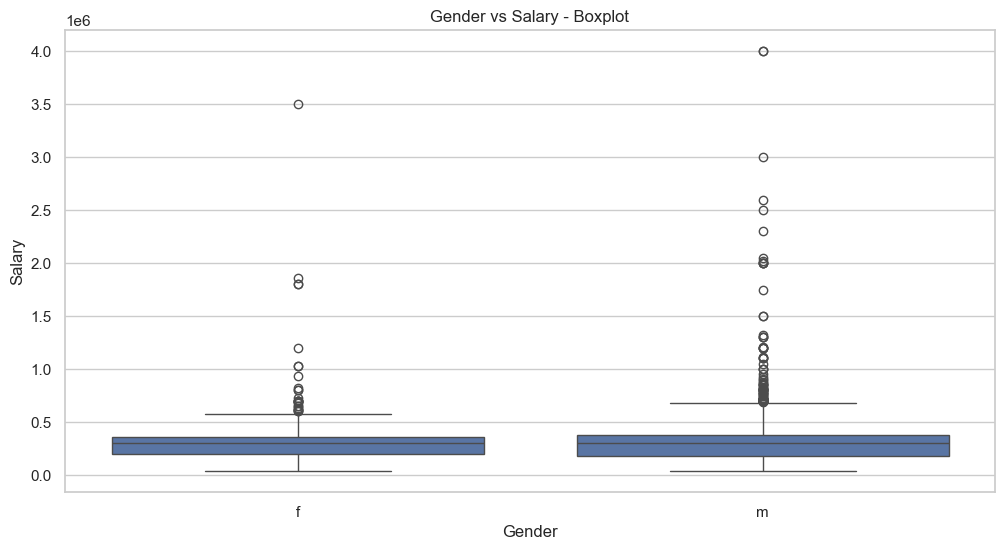

In [4]:
# Boxplot of Salary by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Gender vs Salary - Boxplot')
plt.show()

In [15]:
# Print all unique designations
print(df['Designation'].unique())

['senior quality engineer' 'assistant manager' 'systems engineer'
 'senior software engineer' 'get' 'system engineer'
 'java software engineer' 'mechanical engineer' 'electrical engineer'
 'project engineer' 'senior php developer' 'senior systems engineer'
 'quality assurance engineer' 'qa analyst' 'network engineer'
 'product development engineer' 'associate software developer'
 'data entry operator' 'software engineer' 'developer'
 'electrical project engineer' 'programmer analyst' 'systems analyst'
 'ase' 'telecommunication engineer' 'application developer'
 'ios developer' 'executive assistant' 'online marketing manager'
 'documentation specialist' 'associate software engineer'
 'management trainee' 'site manager' 'software developer' '.net developer'
 'production engineer' 'jr. software engineer'
 'trainee software developer' 'ui developer' 'assistant system engineer'
 'android developer' 'customer service' 'test engineer' 'java developer'
 'engineer' 'recruitment coordinator' 'te

In [19]:
# Check for missing designations
missing_data = df['Designation'].isna().sum()
print(f"Missing designation values: {missing_data}")

Missing designation values: 0


Valid job roles in the data: ['software engineer', 'hardware engineer', 'associate engineer']
count    5.530000e+02
mean     3.397920e+05
std      1.443991e+05
min      6.000000e+04
25%      2.500000e+05
50%      3.200000e+05
75%      4.000000e+05
max      1.500000e+06
Name: Salary, dtype: float64


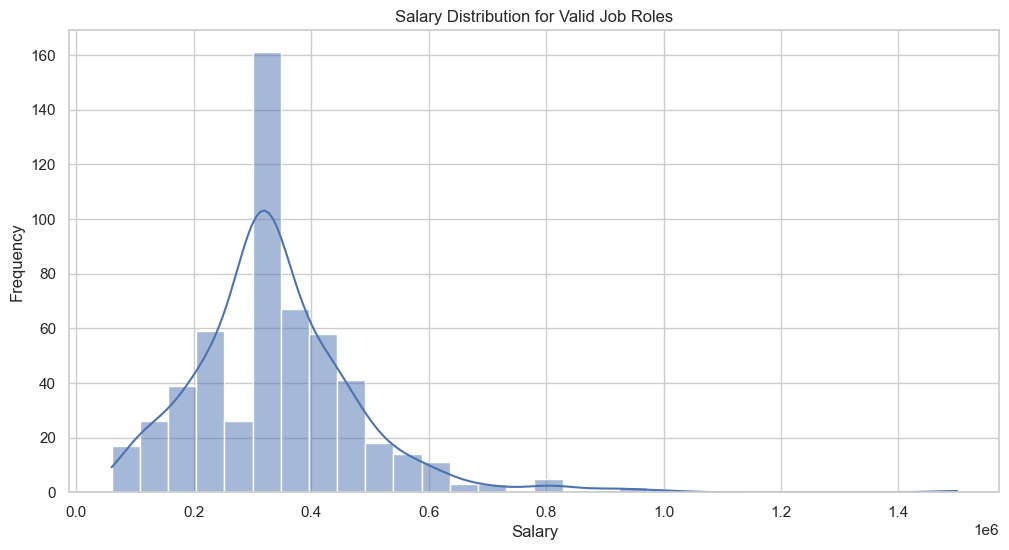

In [20]:
valid_roles = [role for role in correct_job_roles if role in df['Designation'].unique()]
print(f"Valid job roles in the data: {valid_roles}")

if valid_roles:
    # Filter the data using only the valid roles
    filtered_data = df[df['Designation'].isin(valid_roles)]

    # Check if there is salary data available for the valid roles
    if not filtered_data.empty:
        print(filtered_data['Salary'].describe())

        # Plot the salary distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(filtered_data['Salary'], kde=True, bins=30)
        plt.title('Salary Distribution for Valid Job Roles')
        plt.xlabel('Salary')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("No valid salary data found for the selected job roles.")
else:
    print("No valid job roles found in the dataset.")

C:\Users\sbhkg\AppData\Local\Temp\ipykernel_8236\3423239217.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


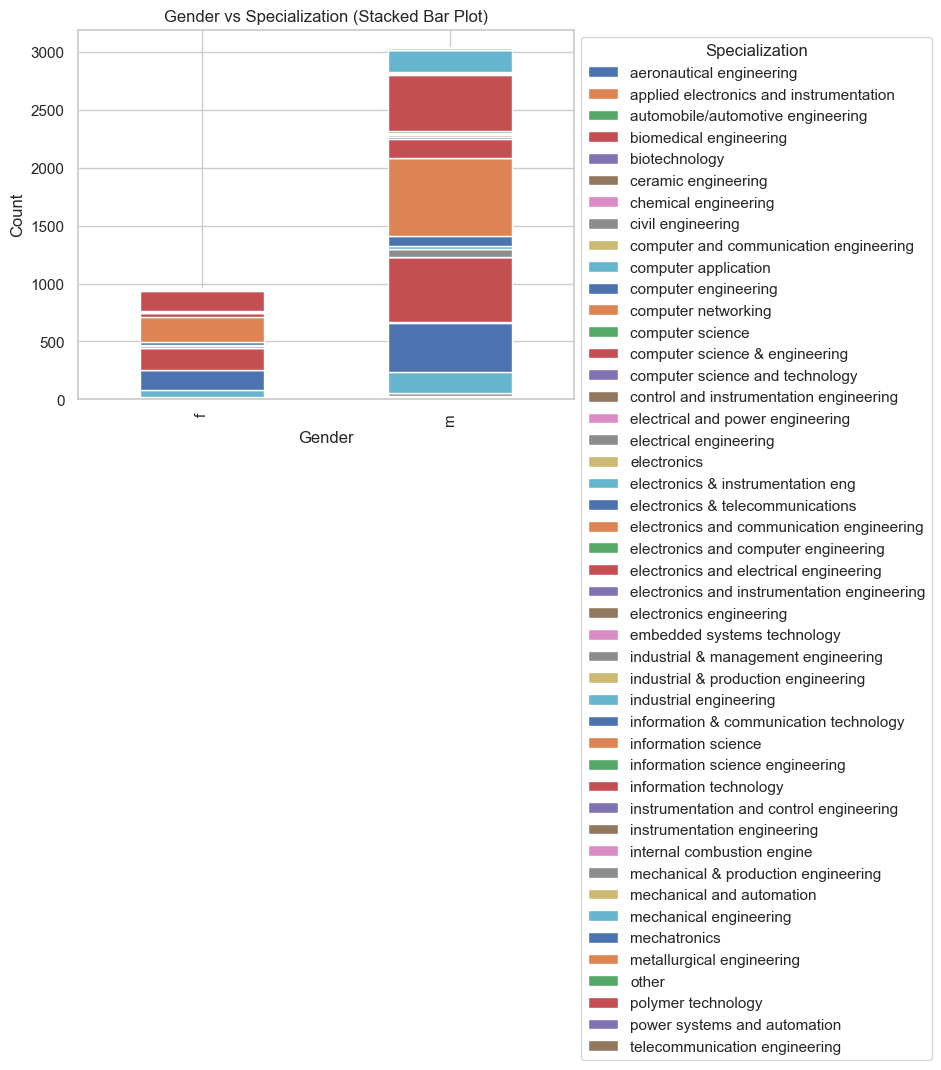

In [7]:
# Crosstab between Gender and Specialization
gender_specialization = pd.crosstab(df['Gender'], df['Specialization'])
gender_specialization.plot(kind='bar', stacked=True)

plt.legend(title='Specialization', bbox_to_anchor=(1, 1), loc='upper left')

plt.title('Gender vs Specialization (Stacked Bar Plot)')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adjust layout to avoid overlap with the legend
plt.tight_layout()

plt.show()